---
# KMeans Clustering
---

In this notebook, we will be clustering based on the numeric features of the data set.



**Results:**

| Cluster | Interpretation for Games| Cluster | Interpretation for Games|
| :---------: |----------------| :---------: |----------------|
| 0       | - Pre-teens</br>- Short play time</br>- Low to high ratings</br>- Average popularity               | 4       | - Teens & Adults</br>- Short to long play time</br>- High ratings</br>- Average popularity                |
| 1       | - Teens & Adults </br>- Moderate play time</br>- Moderate ratings</br>- Low popularity                | 5       | - Teens & Adults</br>- Long play time</br>- High ratings</br>- Highest popularity                 |
| 2       | - Pre-teens</br>- Moderate play time</br>- Moderate ratings</br>- High popularity                | 6       | - Mid-Teens & Adults</br>- Longest play time</br>- Highest ratings</br>- Low popularity                |
| 3       | - Kids</br>- Very short play time</br>- Low ratings</br>- Unpopular                | 7       | - Teens & Adults</br>- Moderate play time</br>- Low to high ratings</br>- Lowest popularity                |


---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

---

<center>
    
## Preparing data

</center>

---

### Read data file

In [2]:
df = pd.read_csv('../data/games_comments_sentiment_summarized.csv')
df

username  rating  \
0     causticforever     NaN   
1          Corwin007     NaN   
2        IronTarkles     NaN   
3             MarkyX     NaN   
4         mikamikomi     1.0   
...              ...     ...   
4193     chicagometh     4.8   
4194    Chris Coyote     NaN   
4195       Chris_P85     9.0   
4196      Chutch1035     5.0   
4197         Citadel     NaN   

                                                comment    gamename  \
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
1                            UPCOMING\n\nArk Nova lite?   Sanctuary   
2                       New game from ark nova designer   Sanctuary   
3     I'm very interested in this one. I like the co...   Sanctuary   
4          3 artist yet still use stock photos? oh yeah   Sanctuary   
...                                                 ...         ...   
4193  4...'Not so good, but could play again' by BGG...  Civolution   
4194                                      Birthday 2025  Civolution   
4195                     Played a half Game at Spiel 24  Civolution   
4196  I love Feld games and I love Civ games. When I...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   

                                              mechanics  min_players  \
0     Action Queue,Hand Management,Hexagon Grid,Open...            1   
1     Action Queue,Hand Management,Hexagon Grid,Open...            1   
2     Action Queue,Hand Management,Hexagon Grid,Open...            1   
3     Action Queue,Hand Management,Hexagon Grid,Open...            1   
4     Action Queue,Hand Management,Hexagon Grid,Open...            1   
...                                                 ...          ...   
4193  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4194  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4195  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4196  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   

      max_players  minplaytime  maxplaytime  age  ratings_avg  count_wanting  \
0               5           40          100   12      7.00000             55   
1               5           40          100   12      7.00000             55   
2               5           40          100   12      7.00000             55   
3               5           40          100   12      7.00000             55   
4               5           40          100   12      7.00000             55   
...           ...          ...          ...  ...          ...            ...   
4193            4           90          180   14      8.21282            580   
4194            4           90          180   14      8.21282            580   
4195            4           90          180   14      8.21282            580   
4196            4           90          180   14      8.21282            580   
4197            4           90          180   14      8.21282            580   

      count_wishing                                        description  \
0               569  In Sanctuary, you will plan and design a moder...   
1               569  In Sanctuary, you will plan and design a moder...   
2               569  In Sanctuary, you will plan and design a moder...   
3               569  In Sanctuary, you will plan and design a moder...   
4               569  In Sanctuary, you will plan and design a moder...   
...             ...                                                ...   
4193           4089  Hello, student beings! The cosmic faculty of t...   
4194           4089  Hello, student beings! The cosmic faculty of t...   
4195           4089  Hello, student beings! The cosmic faculty of t...   
4196           4089  Hello, student beings! The cosmic faculty of t...   
4197           4089  Hello, student beings! The cosmic faculty of t...   

                                             categories lan

In [3]:
df.columns

Index(['username', 'rating', 'comment', 'gamename', 'mechanics', 'min_players',
       'max_players', 'minplaytime', 'maxplaytime', 'age', 'ratings_avg',
       'count_wanting', 'count_wishing', 'description', 'categories', 'lang',
       'Sentiment'],
      dtype='object')

### List of columns to work with

In [4]:
col2discard = []

col2keep = [#'min_players',
            'max_players',
            'minplaytime',
            'maxplaytime', 
            'age', 
            'ratings_avg', 
            'count_wanting',
            'count_wishing',
            'Sentiment'
           ]

col2encode = ['gamename', 
              'mechanics',
              'categories', 
              'lang'
             ]

### Define X features

In [5]:
X = df[col2keep]

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Scale X subset
#X_sub_scaled = scaler.fit_transform(X_sub)

---

<center>
    
## Find best optimal K value

</center>

---

**Elbow plot**

In [7]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 20
for k in range(2, 20):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

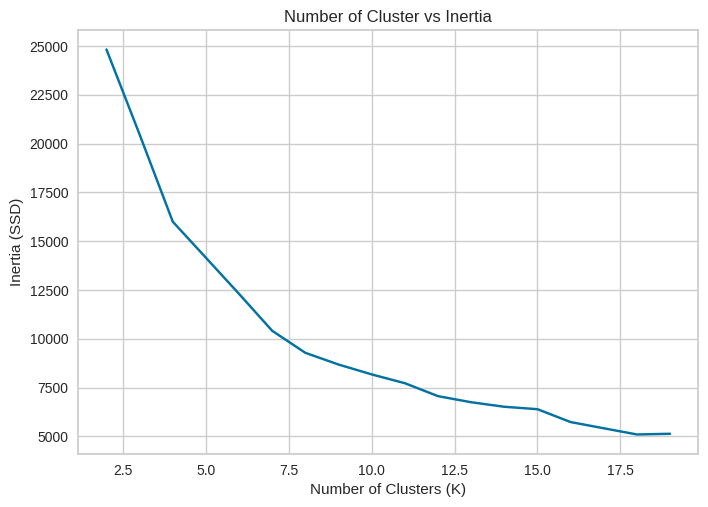

In [8]:
# Plot the elbow graph
plt.plot(range(2, 20), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

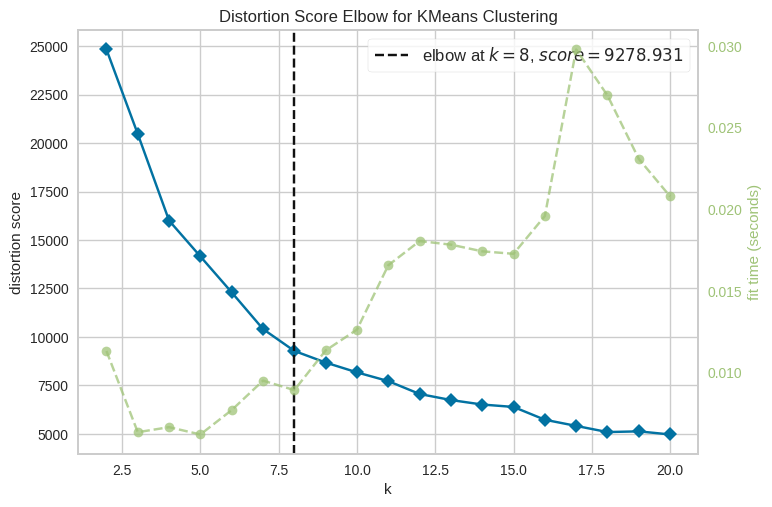

In [9]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=20)
Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

---

<center>
    
## KMeans Model

</center>

---

---
### Creating a KMeans model with 8 clusters

---

**Create intance of model**

In [10]:
kmeans = KMeans(n_clusters=8, random_state=5)

**Fit the model on the dataset**

In [11]:
kmeans.fit(X_scaled)

KMeans(random_state=5)

---
### Evaluate the value K=8 for number of cluster

---

**Add Cluster labels to the dataframe**

In [12]:
df['label'] = kmeans.labels_

df['label_str'] = kmeans.labels_.astype(str)

In [13]:
palette = [
    "green",
    "magenta",
    "deepskyblue",
    "darkorchid",
    "lightpink",
    "darkorange",
    "red",
    "navy",
    "chartreuse",
    "tomato",
    "turquoise",
    "dodgerblue",
    "yellowgreen",
    "deeppink",
    "springgreen"
]

/tmp/ipykernel_72975/4025038026.py:5: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.countplot(x=df['label'], hue=df['label'], legend=False, palette=palette)


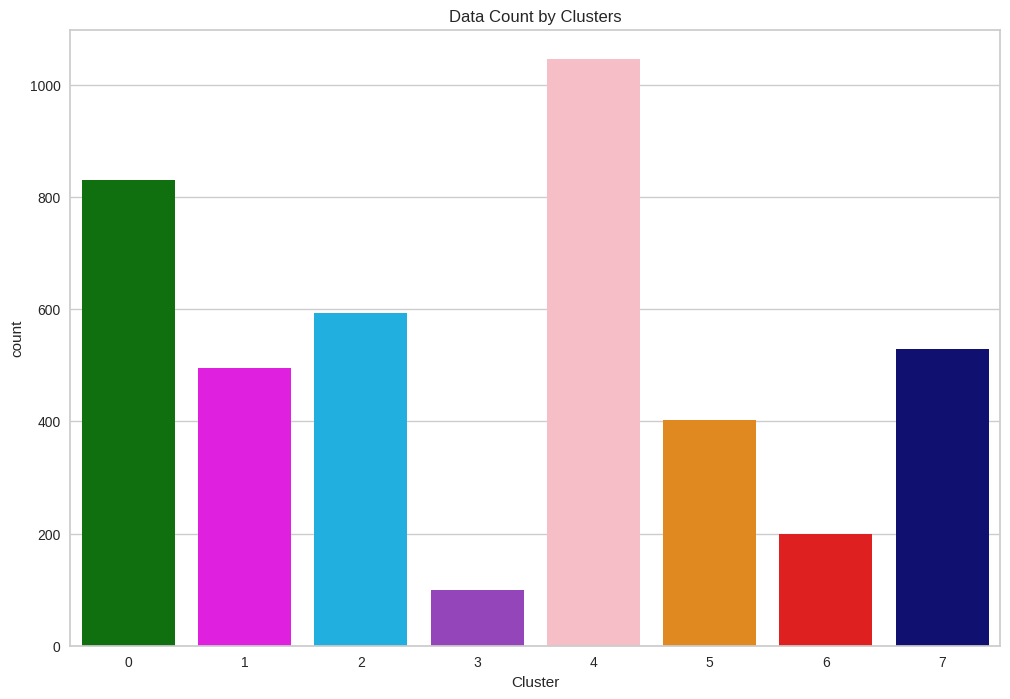

In [14]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df['label'], hue=df['label'], legend=False, palette=palette)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Save plot
plt.savefig('../graph/Distribution_Cluster.png')

# Show plot
plt.show()

---

<center>
    
## Cluster Analysis

</center>

---

**Play Time vs Clusters**

/tmp/ipykernel_72975/3701893586.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['minplaytime'], y=df['maxplaytime'], hue='label_str', legend=True, palette=palette)


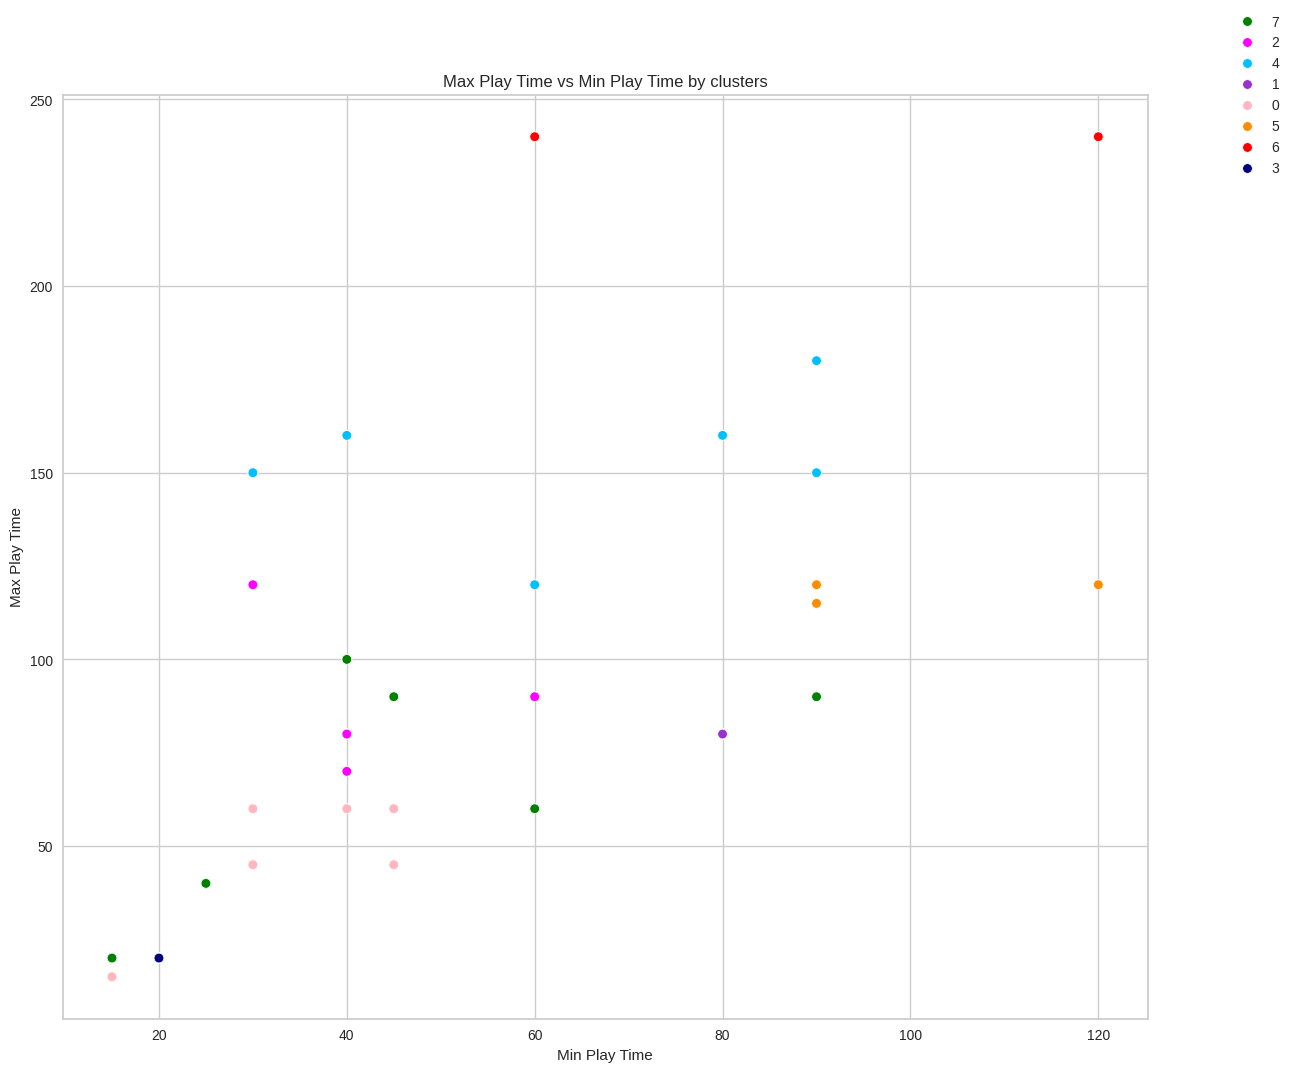

In [15]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['minplaytime'], y=df['maxplaytime'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Max Play Time vs Min Play Time by clusters')

# Add axis labels
ax.set_xlabel('Min Play Time')
ax.set_ylabel('Max Play Time')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**# of Player vs Clusters**

/tmp/ipykernel_72975/3724949077.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['min_players'], y=df['max_players'], hue='label_str', legend=True, palette=palette)


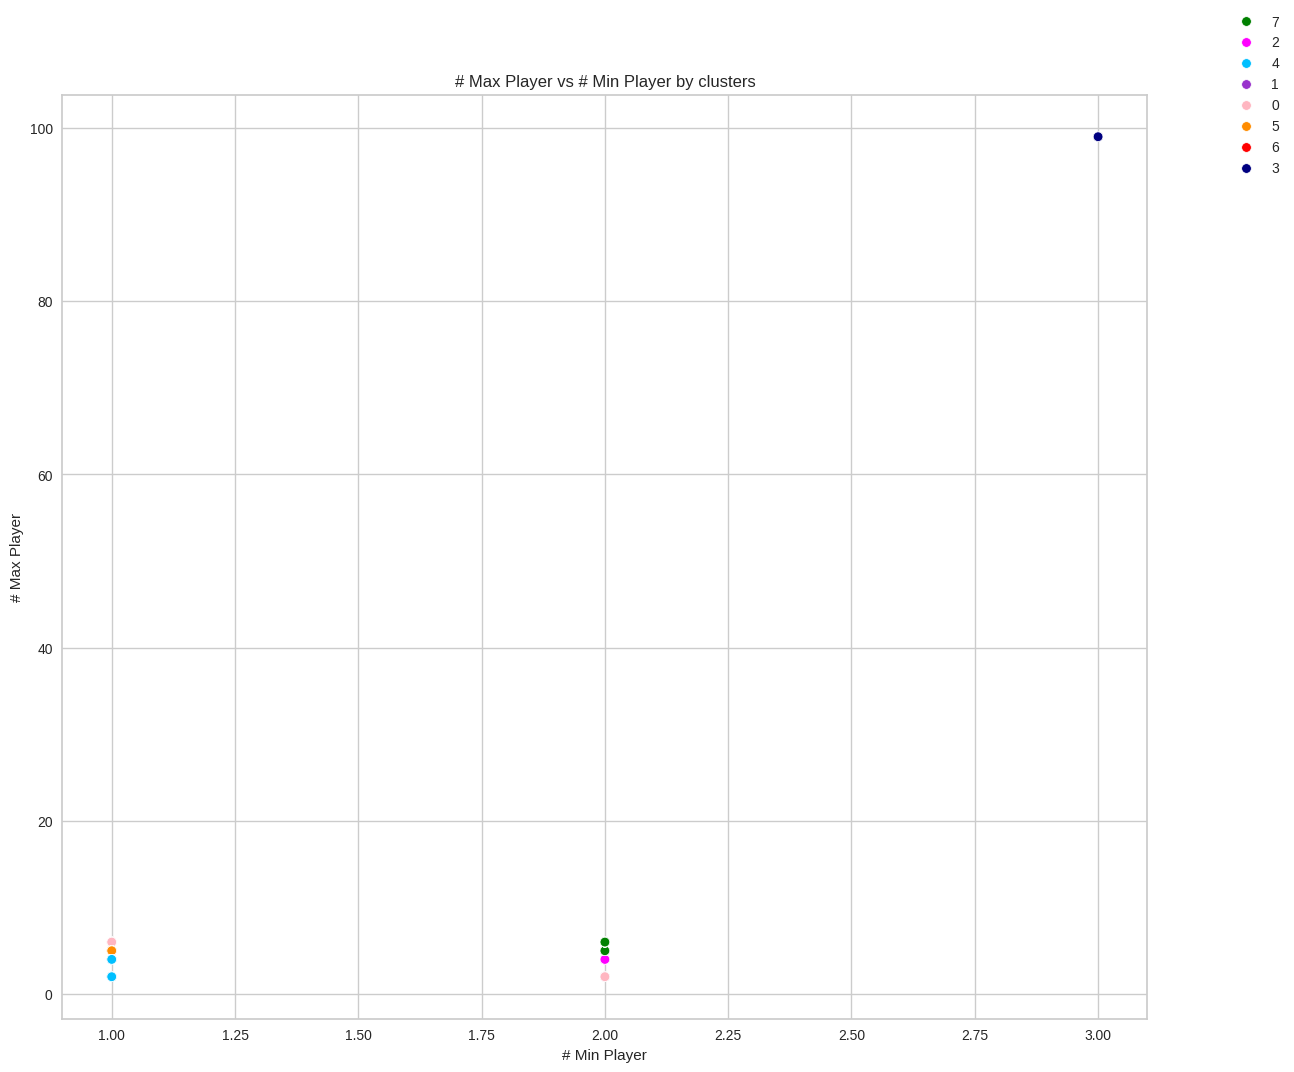

In [16]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['min_players'], y=df['max_players'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'# Max Player vs # Min Player by clusters')

# Add axis labels
ax.set_xlabel('# Min Player')
ax.set_ylabel('# Max Player')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Age vs Rating Average**

/tmp/ipykernel_72975/703315945.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['ratings_avg'], y=df['age'], hue='label_str', legend=True, palette=palette)


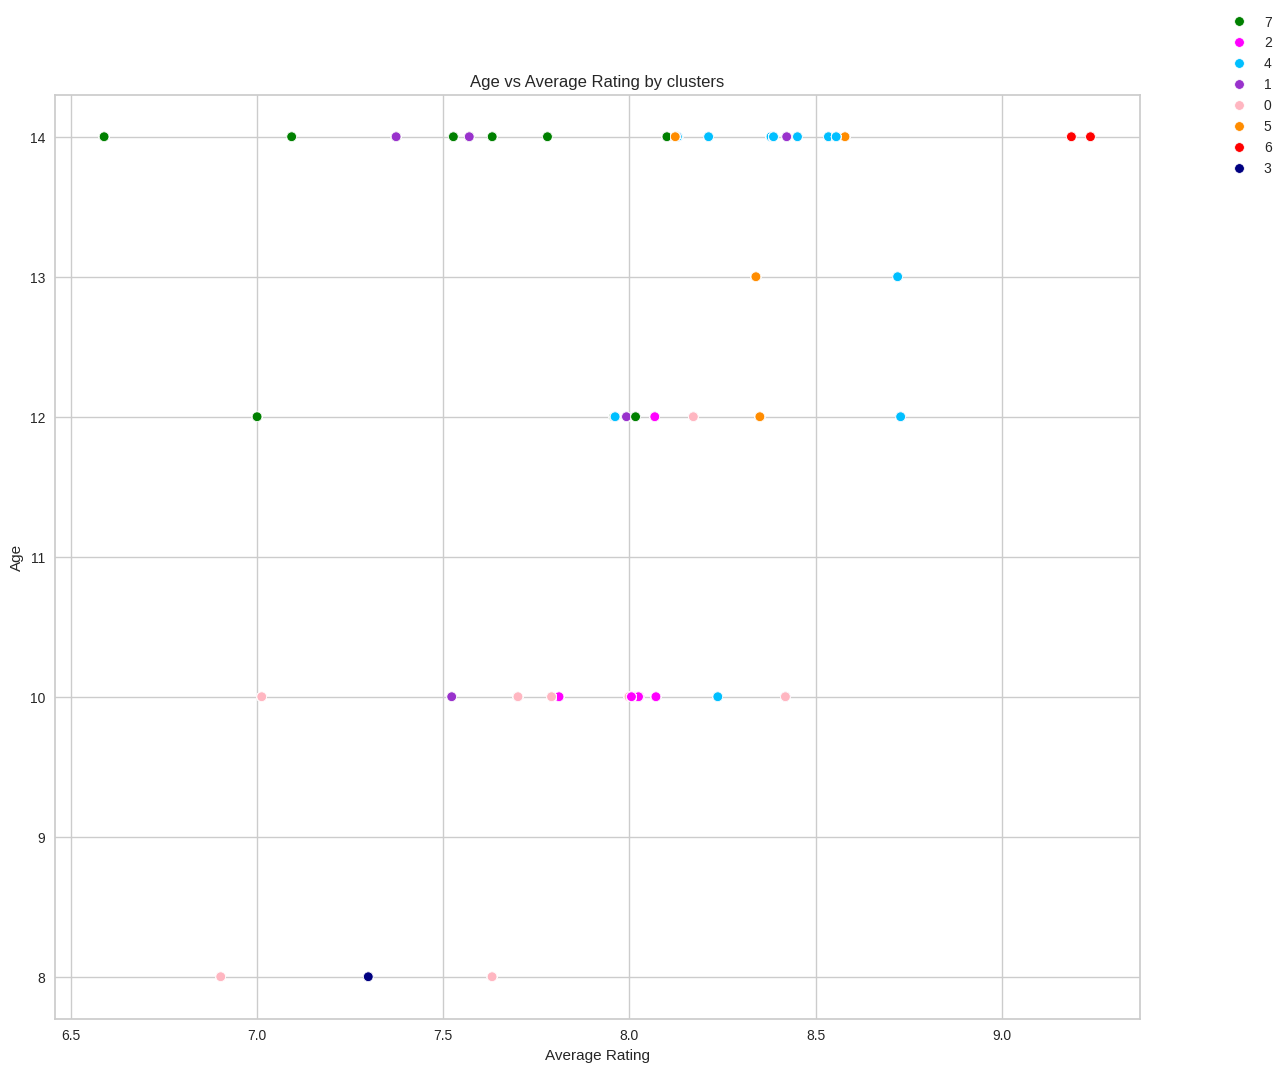

In [17]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['ratings_avg'], y=df['age'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Age vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Average Rating')
ax.set_ylabel('Age')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Sentiment vs Rating Average**

/tmp/ipykernel_72975/3928715605.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['Sentiment'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)


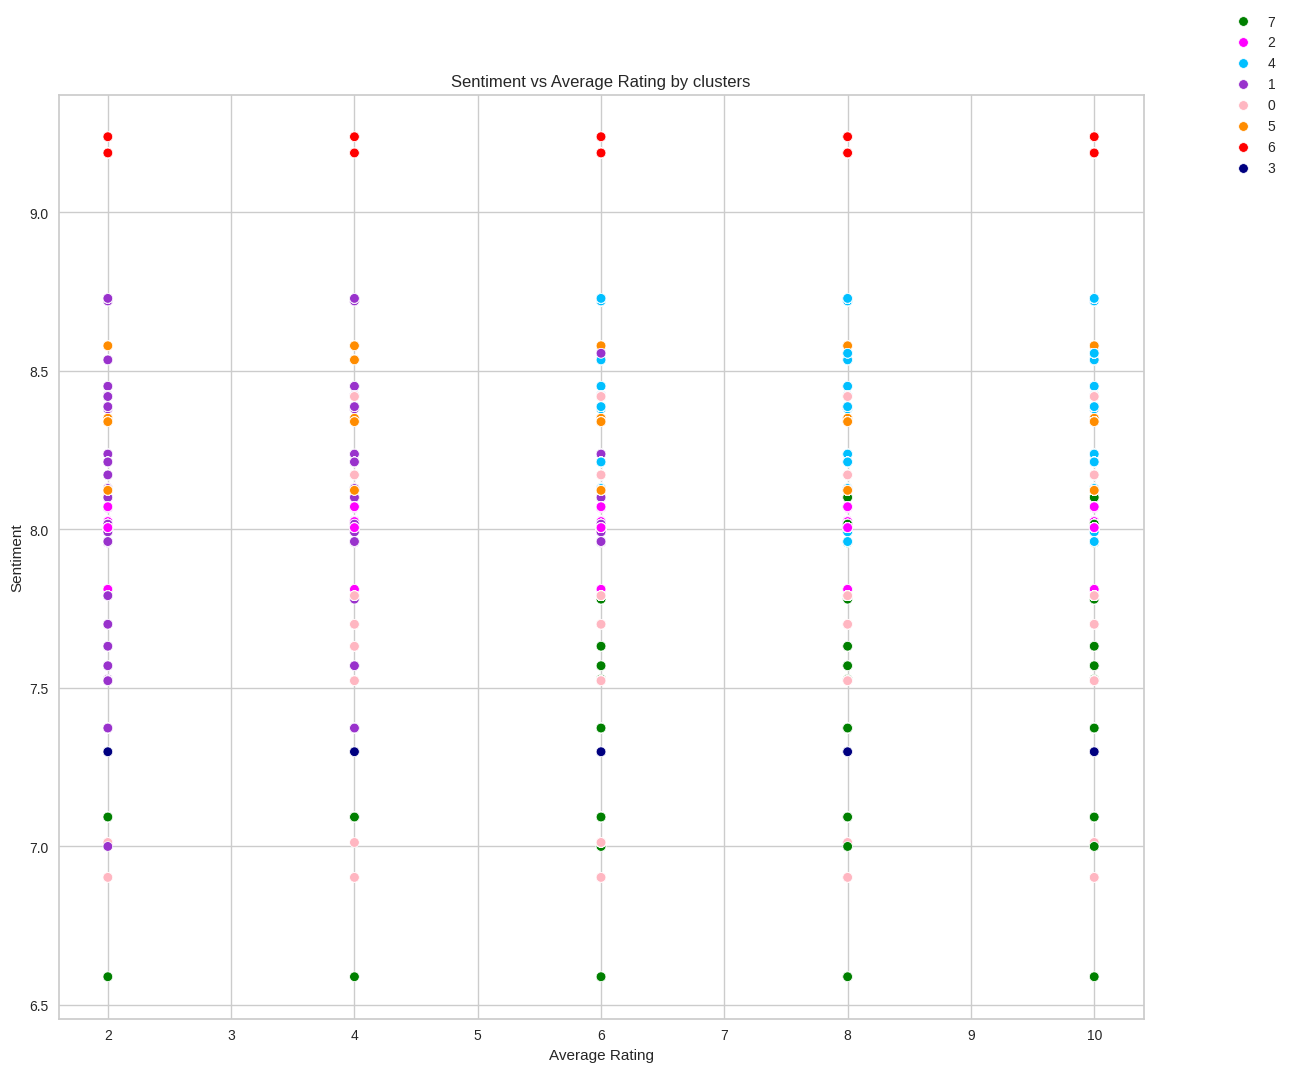

In [18]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['Sentiment'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Sentiment vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Average Rating')
ax.set_ylabel('Sentiment')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Language vs Rating Average**

/tmp/ipykernel_72975/1038124742.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['lang'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)


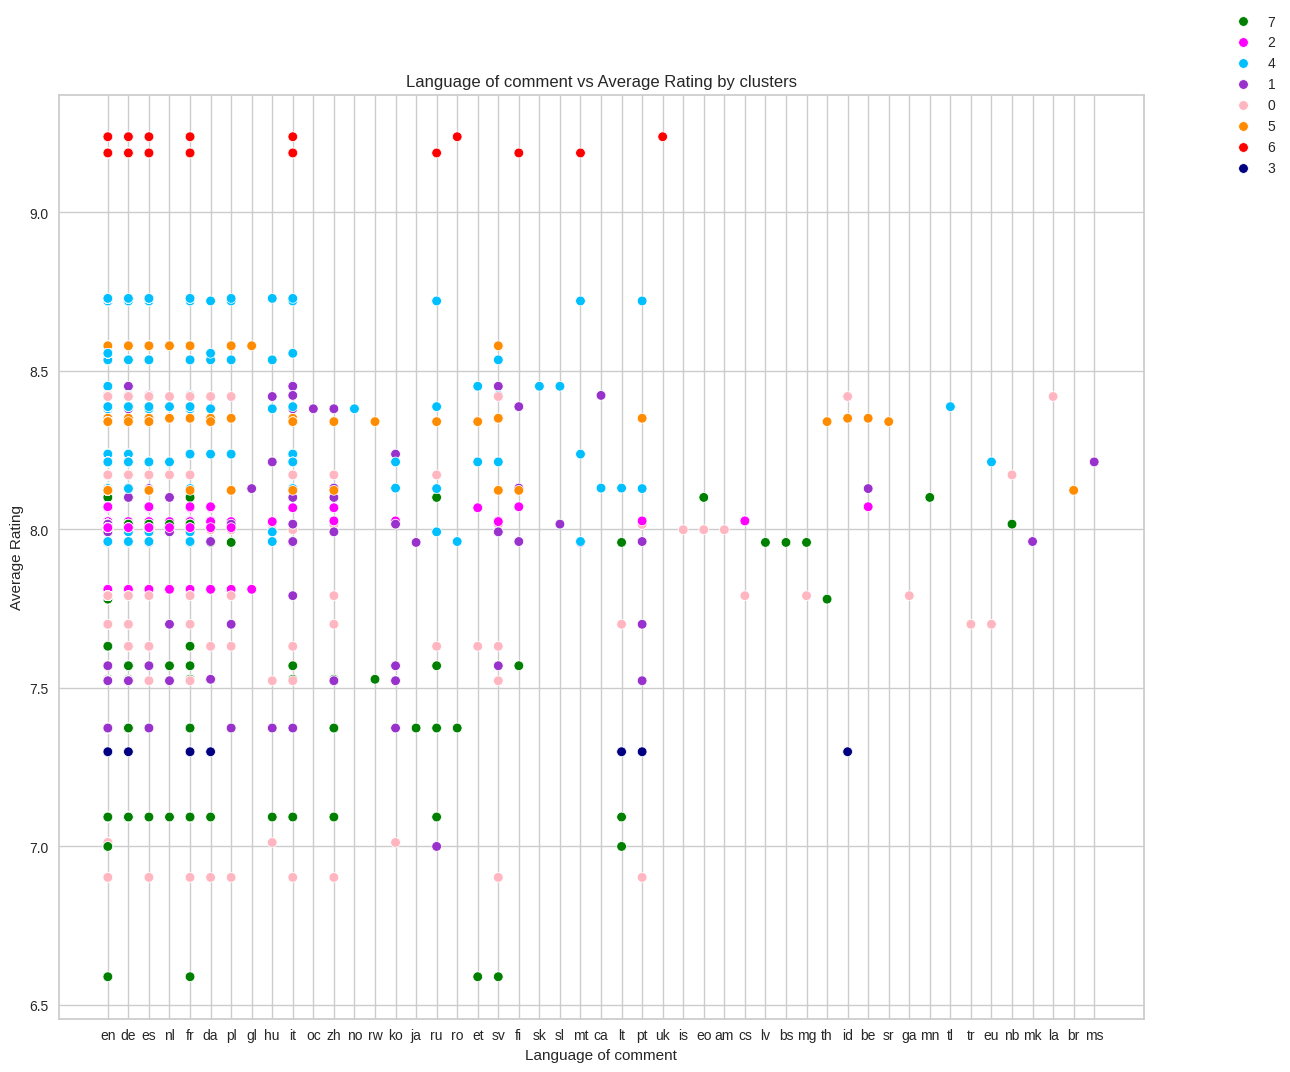

In [19]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['lang'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Language of comment vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Language of comment')
ax.set_ylabel('Average Rating')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Wish Count vs Rating Average**

/tmp/ipykernel_72975/112354155.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x='count_wishing', y='ratings_avg', hue='label_str', legend=True, palette=palette)


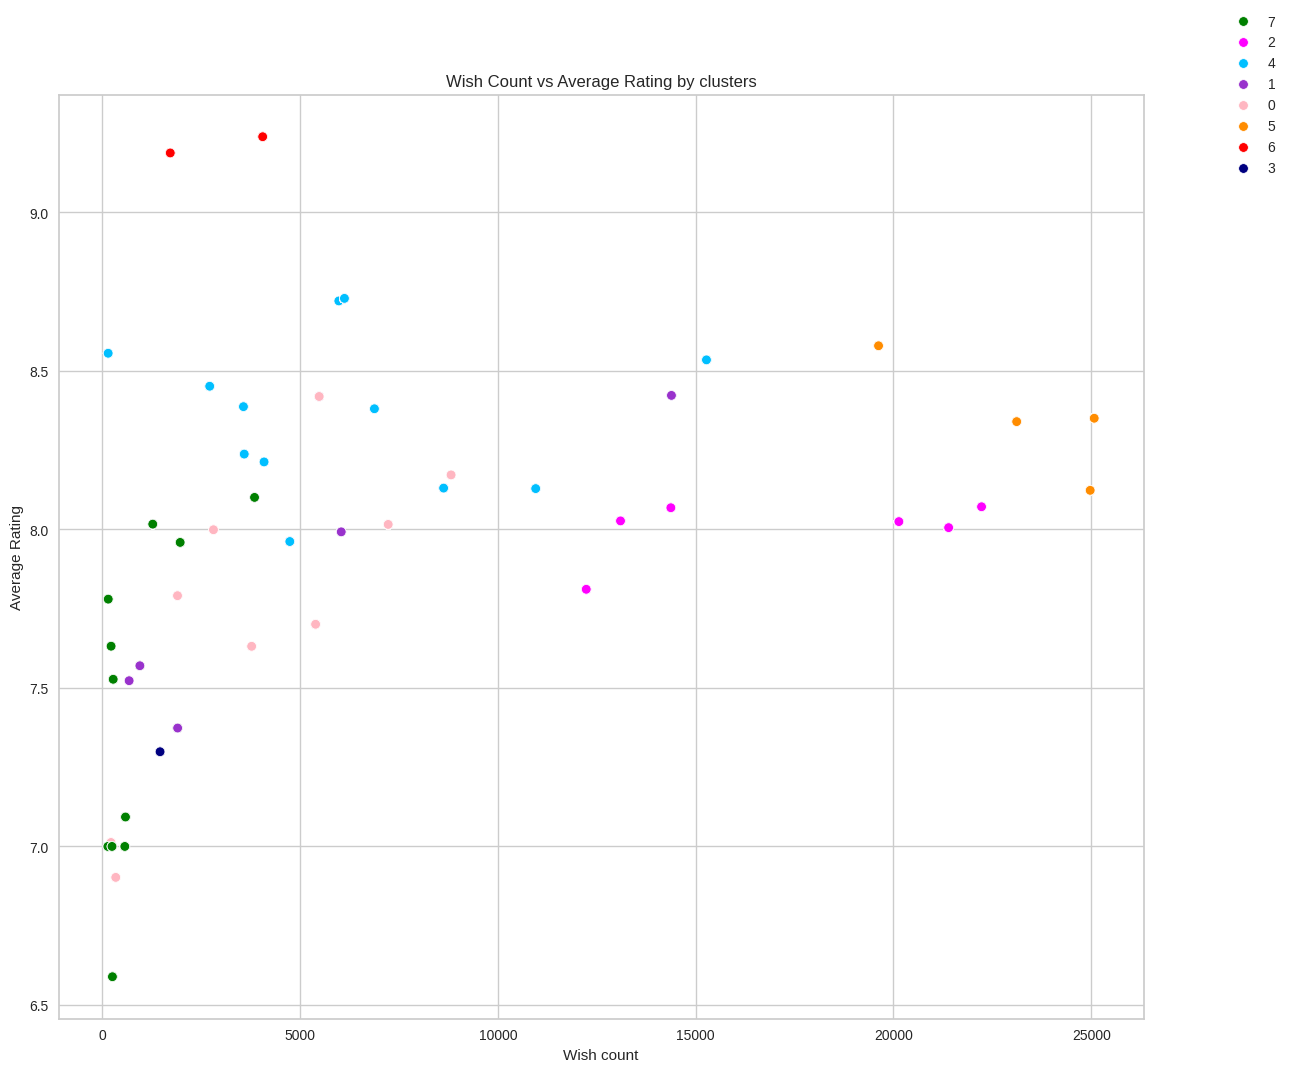

In [20]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x='count_wishing', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Wish Count vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Wish count')
ax.set_ylabel('Average Rating')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Wanting Count vs Rating Average**

/tmp/ipykernel_72975/201869863.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x='count_wanting', y='ratings_avg', hue='label_str', legend=True, palette=palette)


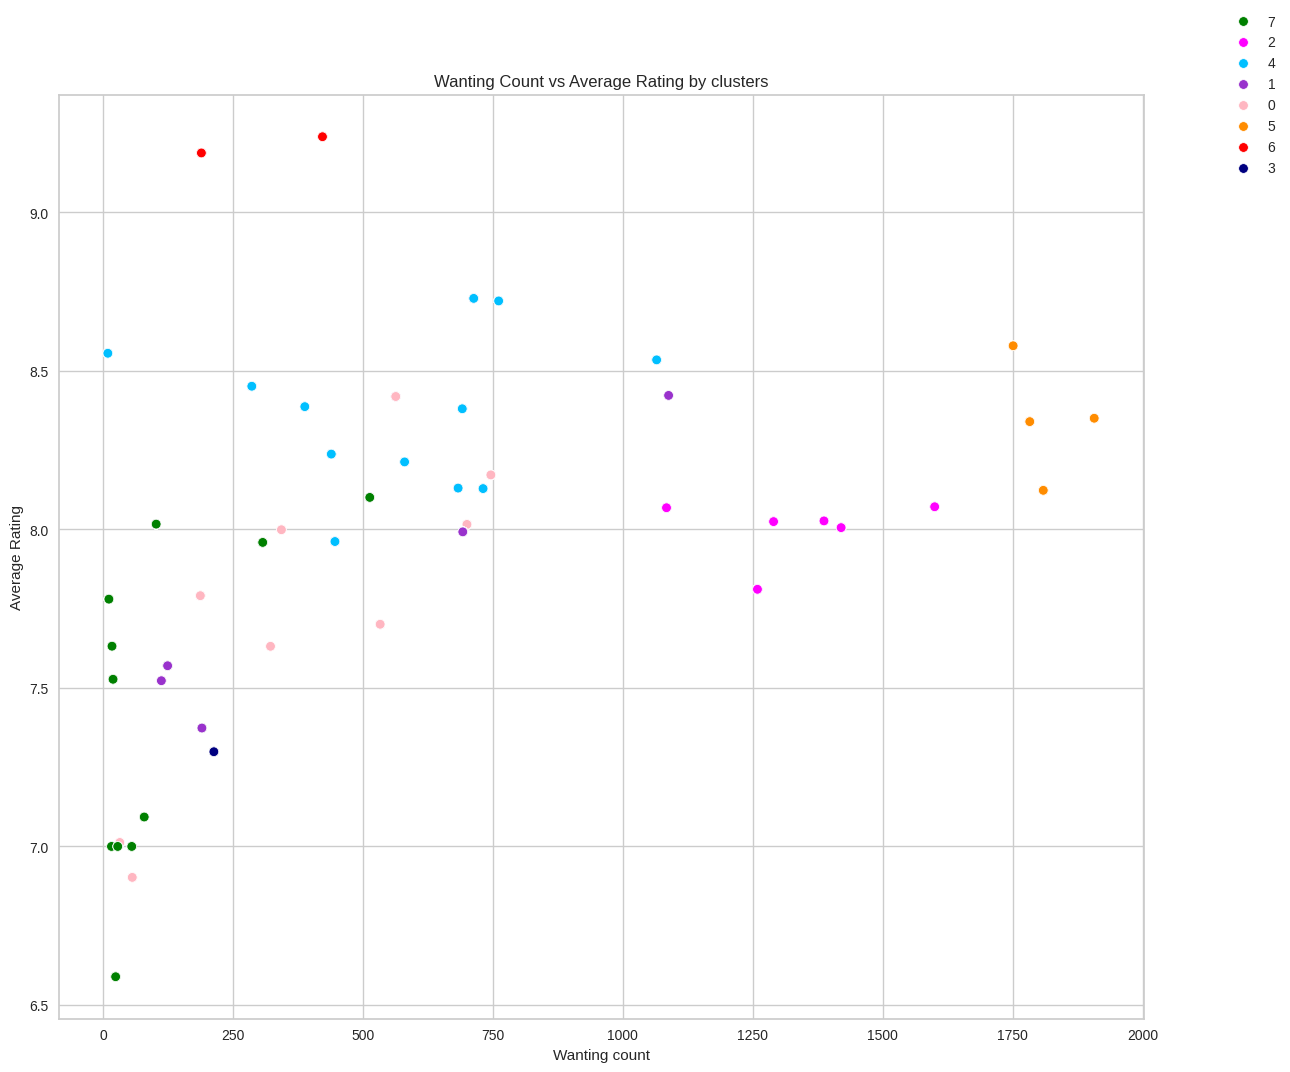

In [21]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x='count_wanting', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Wanting Count vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Wanting count')
ax.set_ylabel('Average Rating')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Rating vs category**

In [22]:
tmp = df.copy()

tmp['categories'] = tmp['categories'].str.split(',')

tmp = tmp.explode('categories')
tmp

username  rating  \
0     causticforever     NaN   
0     causticforever     NaN   
0     causticforever     NaN   
1          Corwin007     NaN   
1          Corwin007     NaN   
...              ...     ...   
4197         Citadel     NaN   
4197         Citadel     NaN   
4197         Citadel     NaN   
4197         Citadel     NaN   
4197         Citadel     NaN   

                                                comment    gamename  \
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
1                            UPCOMING\n\nArk Nova lite?   Sanctuary   
1                            UPCOMING\n\nArk Nova lite?   Sanctuary   
...                                                 ...         ...   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   

                                              mechanics  min_players  \
0     Action Queue,Hand Management,Hexagon Grid,Open...            1   
0     Action Queue,Hand Management,Hexagon Grid,Open...            1   
0     Action Queue,Hand Management,Hexagon Grid,Open...            1   
1     Action Queue,Hand Management,Hexagon Grid,Open...            1   
1     Action Queue,Hand Management,Hexagon Grid,Open...            1   
...                                                 ...          ...   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   

      max_players  minplaytime  maxplaytime  age  ratings_avg  count_wanting  \
0               5           40          100   12      7.00000             55   
0               5           40          100   12      7.00000             55   
0               5           40          100   12      7.00000             55   
1               5           40          100   12      7.00000             55   
1               5           40          100   12      7.00000             55   
...           ...          ...          ...  ...          ...            ...   
4197            4           90          180   14      8.21282            580   
4197            4           90          180   14      8.21282            580   
4197            4           90          180   14      8.21282            580   
4197            4           90          180   14      8.21282            580   
4197            4           90          180   14      8.21282            580   

      count_wishing                                        description  \
0               569  In Sanctuary, you will plan and design a moder...   
0               569  In Sanctuary, you will plan and design a moder...   
0               569  In Sanctuary, you will plan and design a moder...   
1               569  In Sanctuary, you will plan and design a moder...   
1               569  In Sanctuary, you will plan and design a moder...   
...             ...                                                ...   
4197           4089  Hello, student beings! The cosmic faculty of t...   
4197           4089  Hello, student beings! The cosmic faculty of t...   
4197           4089  Hello, student beings! The cosmic faculty of t...   
4197           4089  Hello, student beings! The cosmic faculty of t...   
4197           4089  Hello, student beings! The cosmic faculty of t...   

              categories lang  Sentiment  label label_str  

/tmp/ipykernel_72975/1679767958.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='categories', y='ratings_avg', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_72975/1679767958.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp['categories'].unique(),rotation=90)


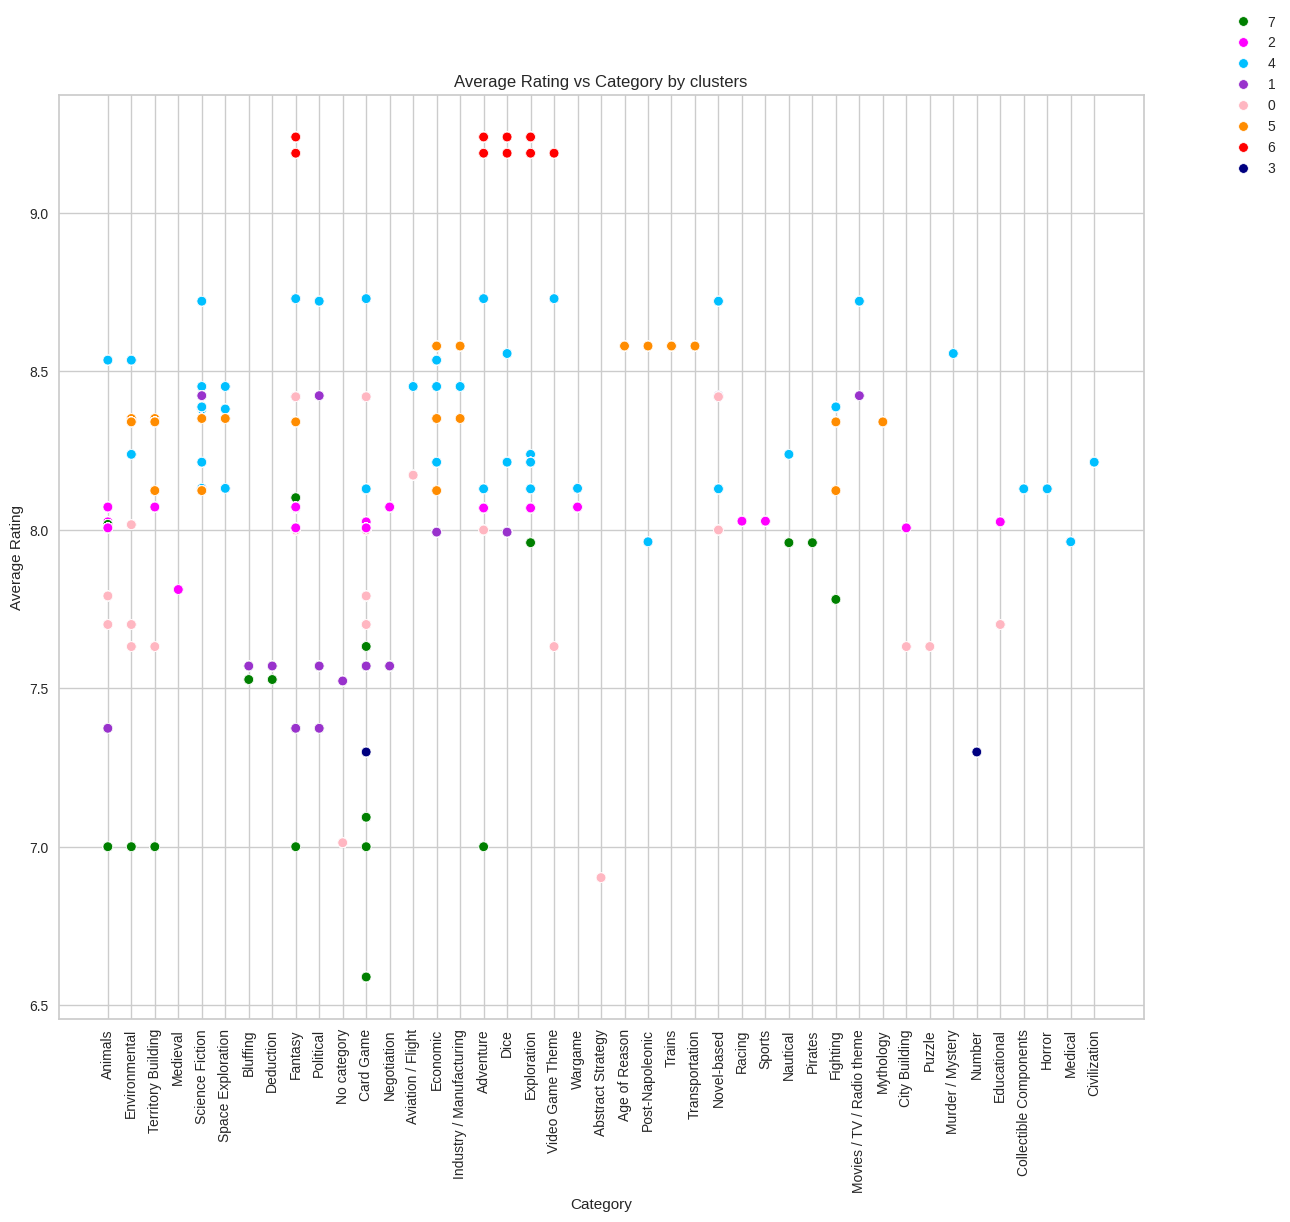

In [23]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='categories', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Average Rating vs Category by clusters')

# Add axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Average Rating')

#
ax.set_xticklabels(tmp['categories'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_72975/827099167.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='categories', y='Sentiment', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_72975/827099167.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp['categories'].unique(),rotation=90)


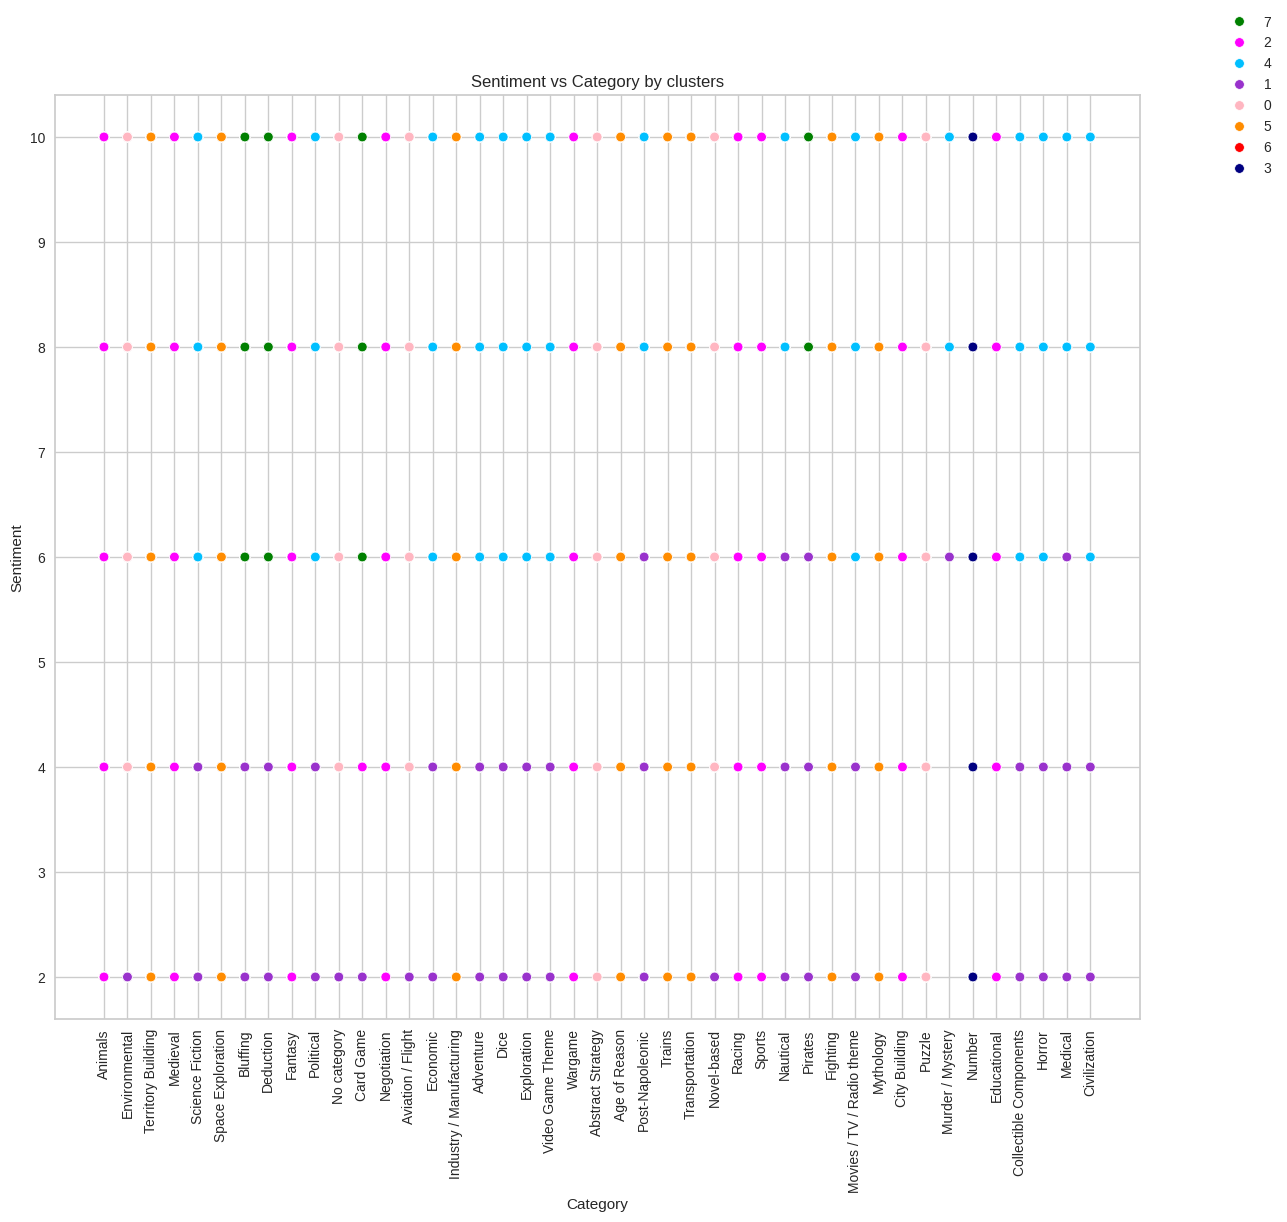

In [24]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='categories', y='Sentiment', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Sentiment vs Category by clusters')

# Add axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Sentiment')

#
ax.set_xticklabels(tmp['categories'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_72975/1593554757.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='categories', y='age', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_72975/1593554757.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp['categories'].unique(),rotation=90)


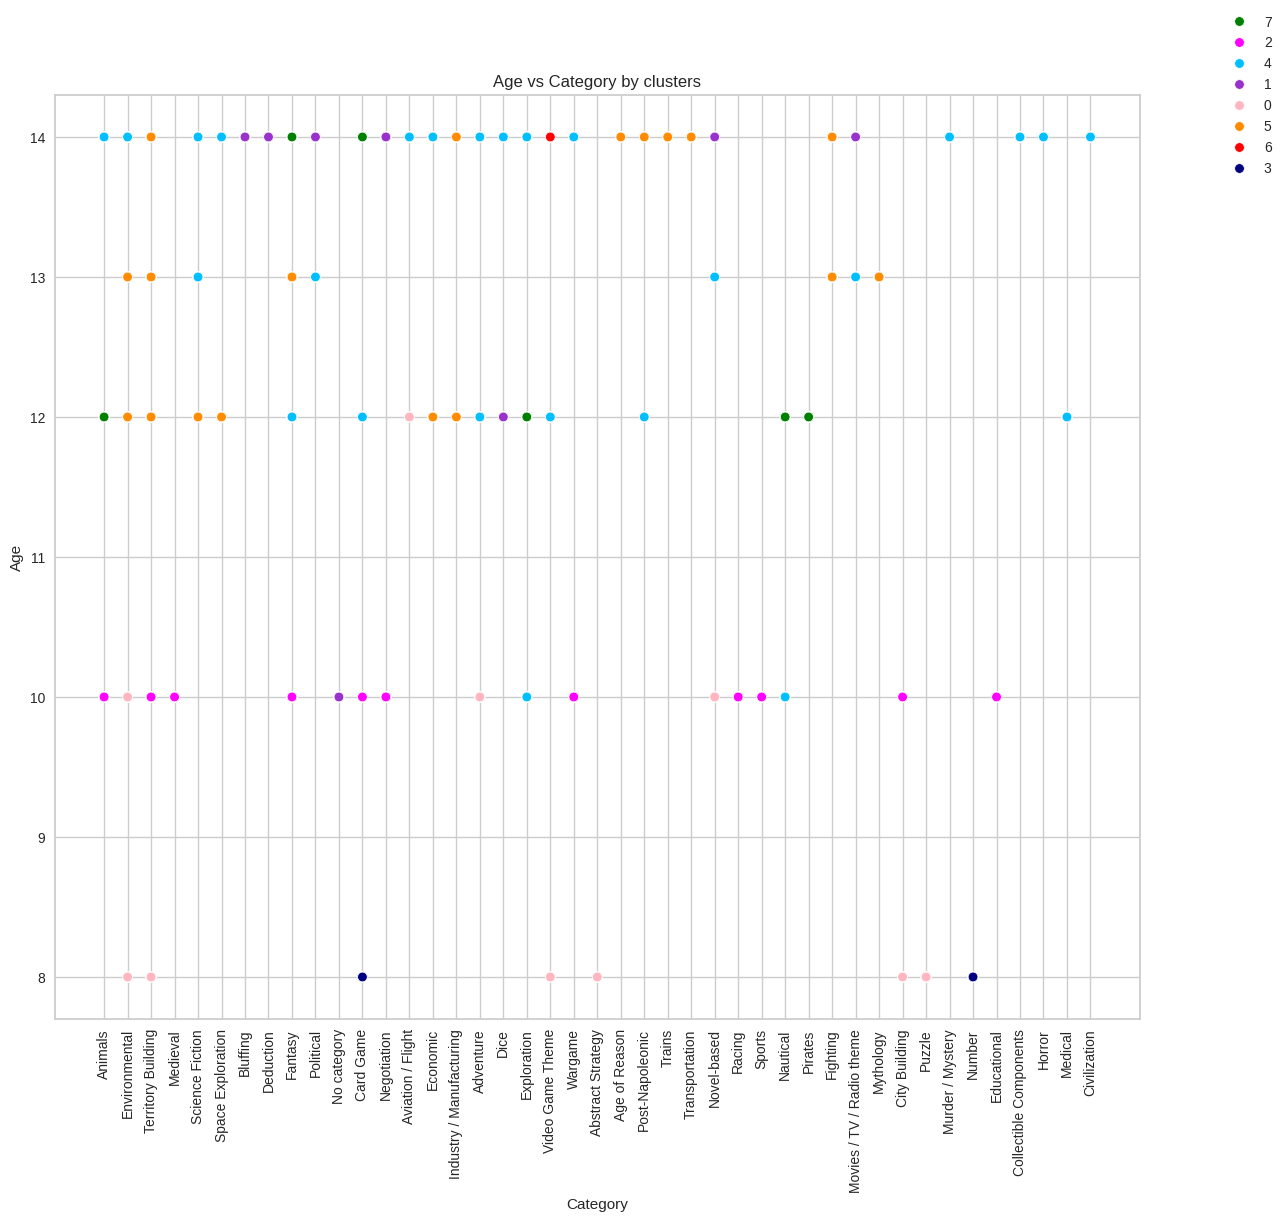

In [25]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='categories', y='age', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Age vs Category by clusters')

# Add axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Age')

#
ax.set_xticklabels(tmp['categories'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_72975/3230854685.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='categories', y='lang', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_72975/3230854685.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp['categories'].unique(),rotation=90)


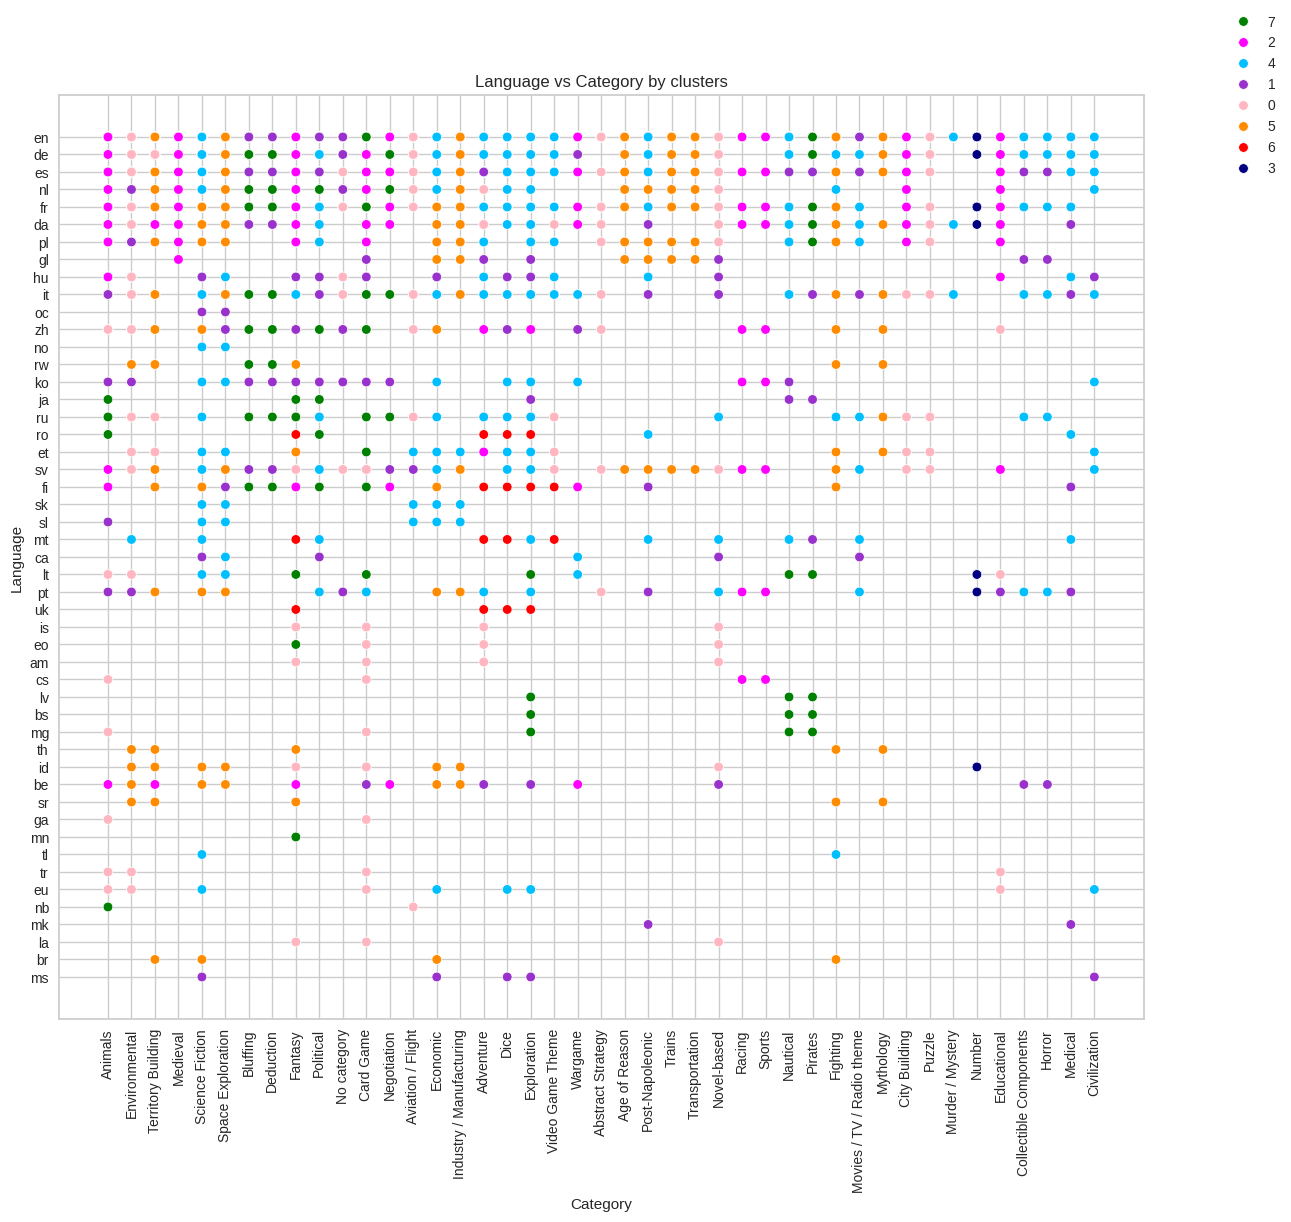

In [26]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='categories', y='lang', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Language vs Category by clusters')

# Add axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Language')

#
ax.set_xticklabels(tmp['categories'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_72975/1522651276.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='ratings_avg', y='maxplaytime', hue='label_str', legend=True, palette=palette)


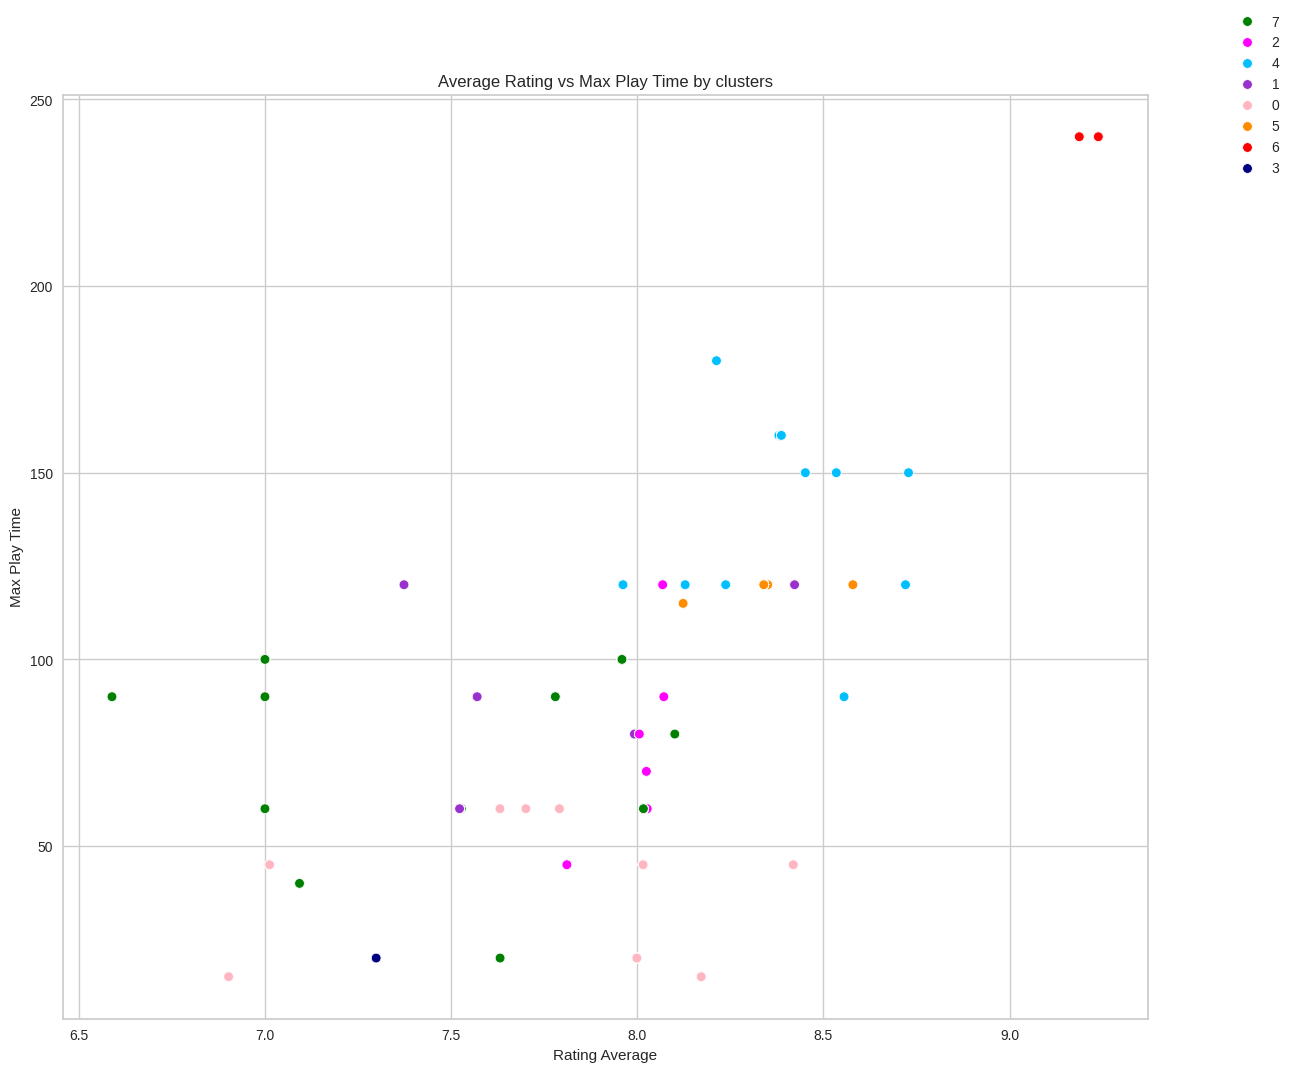

In [27]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='ratings_avg', y='maxplaytime', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Average Rating vs Max Play Time by clusters')

# Add axis labels
ax.set_xlabel('Rating Average')
ax.set_ylabel('Max Play Time')

#
#ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Rating vs mechanics**

In [28]:
tmp = df.copy()

tmp['mechanics'] = tmp['mechanics'].str.split(',')

tmp = tmp.explode('mechanics')
tmp

username  rating  \
0     causticforever     NaN   
0     causticforever     NaN   
0     causticforever     NaN   
0     causticforever     NaN   
0     causticforever     NaN   
...              ...     ...   
4197         Citadel     NaN   
4197         Citadel     NaN   
4197         Citadel     NaN   
4197         Citadel     NaN   
4197         Citadel     NaN   

                                                comment    gamename  \
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
...                                                 ...         ...   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   

                     mechanics  min_players  max_players  minplaytime  \
0                 Action Queue            1            5           40   
0              Hand Management            1            5           40   
0                 Hexagon Grid            1            5           40   
0                Open Drafting            1            5           40   
0               Set Collection            1            5           40   
...                        ...          ...          ...          ...   
4197             Open Drafting            1            4           90   
4197          Pattern Building            1            4           90   
4197  Tech Trees / Tech Tracks            1            4           90   
4197            Track Movement            1            4           90   
4197           Variable Set-up            1            4           90   

      maxplaytime  age  ratings_avg  count_wanting  count_wishing  \
0             100   12      7.00000             55            569   
0             100   12      7.00000             55            569   
0             100   12      7.00000             55            569   
0             100   12      7.00000             55            569   
0             100   12      7.00000             55            569   
...           ...  ...          ...            ...            ...   
4197          180   14      8.21282            580           4089   
4197          180   14      8.21282            580           4089   
4197          180   14      8.21282            580           4089   
4197          180   14      8.21282            580           4089   
4197          180   14      8.21282            580           4089   

                                            description  \
0     In Sanctuary, you will plan and design a moder...   
0     In Sanctuary, you will plan and design a moder...   
0     In Sanctuary, you will plan and design a moder...   
0     In Sanctuary, you will plan and design a moder...   
0     In Sanctuary, you will plan and design a moder...   
...                                                 ...   
4197  Hello, student beings! The cosmic faculty of t...   
4197  Hello, student beings! The cosmic faculty of t...   
4197  Hello, student beings! The cosmic faculty of t...   
4197  Hello, student beings! The cosmic faculty of t...   
4197  Hello, student beings! The cosmic faculty of t...   

                                             categories lang  Sentiment  \
0              Animals,Environmental,Territory Building   en          8   
0              Animals,Environmental,Territory Building   en          8   
0              Animals,Environmental,Territory Building   en          8   
0              Animals,Environmental,Territory Building   e

/tmp/ipykernel_72975/2019836324.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='mechanics', y='ratings_avg', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_72975/2019836324.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp['mechanics'].unique(),rotation=90)


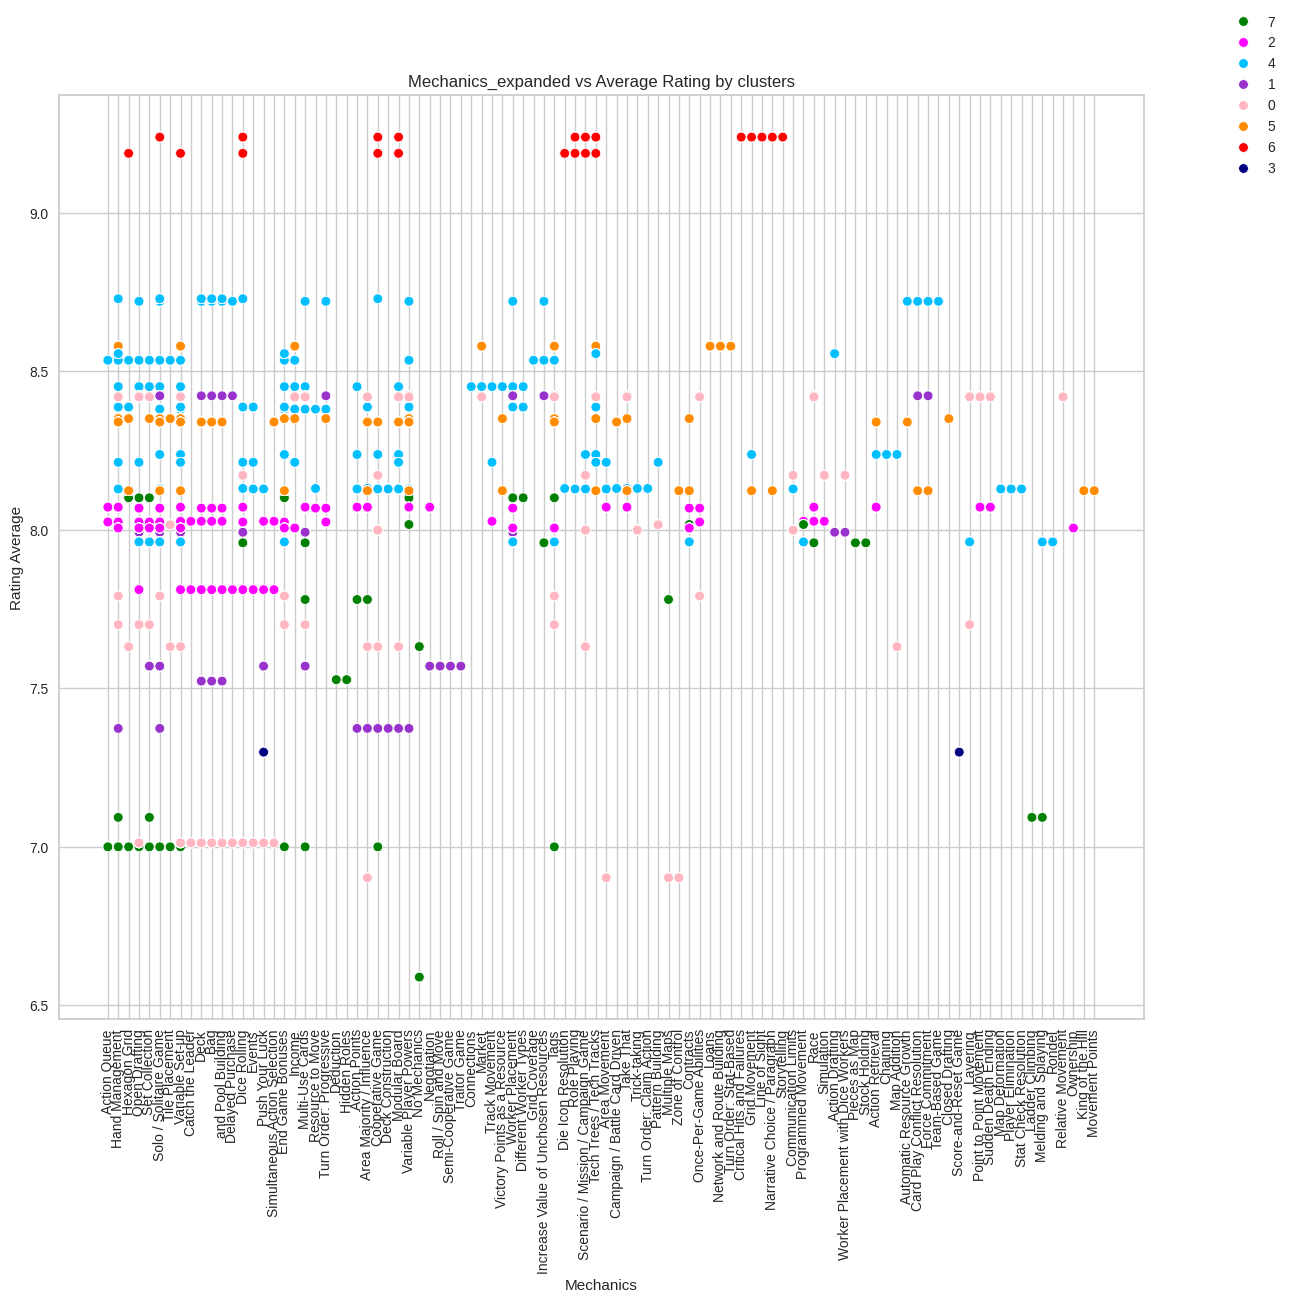

In [29]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='mechanics', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Mechanics_expanded vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Mechanics')
ax.set_ylabel('Rating Average')

#
ax.set_xticklabels(tmp['mechanics'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_72975/1260306742.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='mechanics', y='age', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_72975/1260306742.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp['mechanics'].unique(),rotation=90)


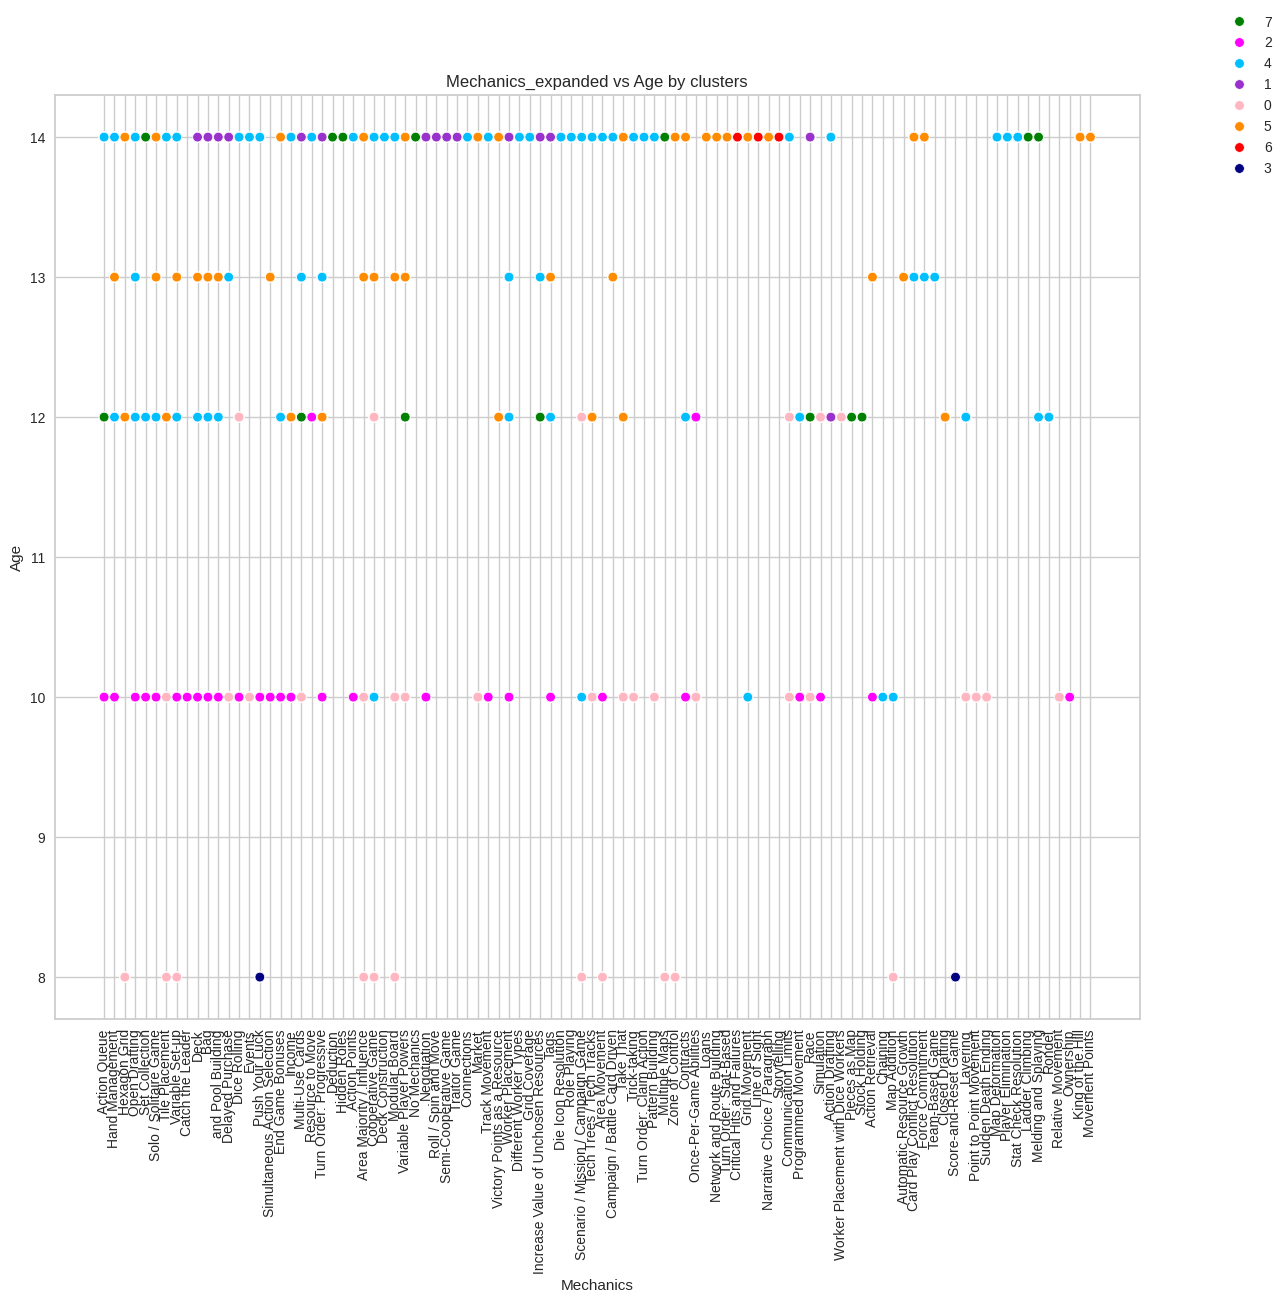

In [30]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='mechanics', y='age', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Mechanics_expanded vs Age by clusters')

# Add axis labels
ax.set_xlabel('Mechanics')
ax.set_ylabel('Age')

#
ax.set_xticklabels(tmp['mechanics'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_72975/2855871322.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(tmp, x='mechanics', y='lang', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_72975/2855871322.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp['mechanics'].unique(),rotation=90)


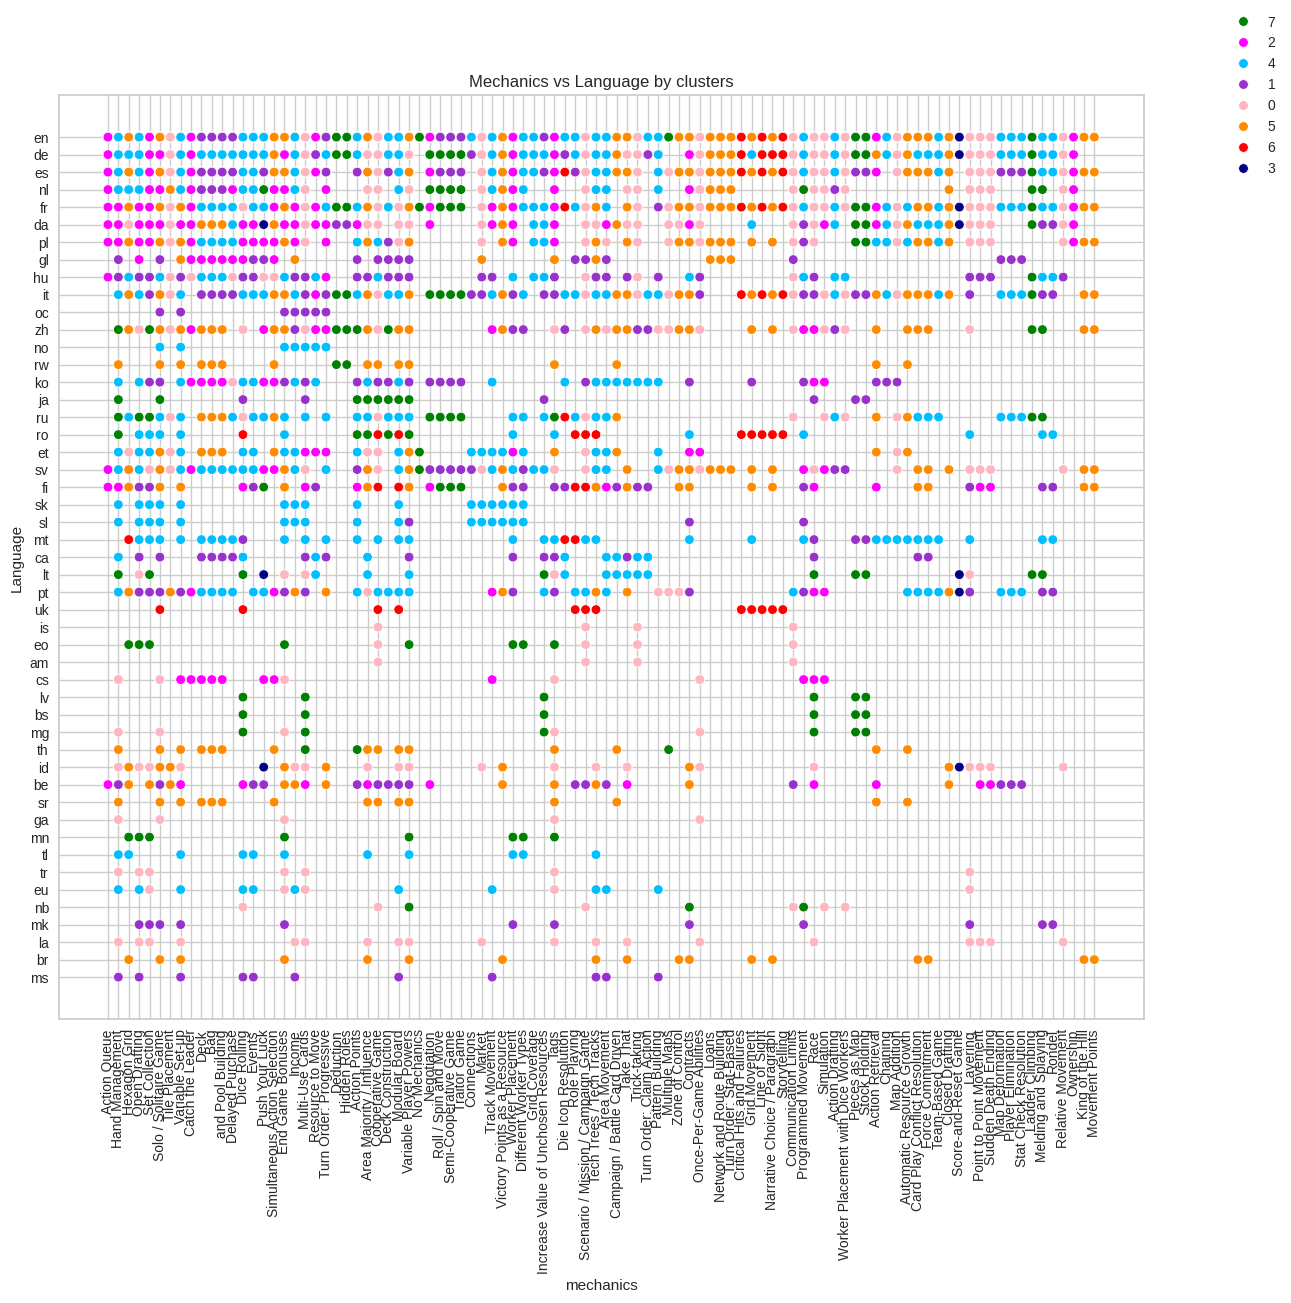

In [31]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(tmp, x='mechanics', y='lang', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Mechanics vs Language by clusters')

# Add axis labels
ax.set_xlabel('mechanics')
ax.set_ylabel('Language')

#
ax.set_xticklabels(tmp['mechanics'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_72975/625409923.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='age', legend=False, hue='label', palette=palette)


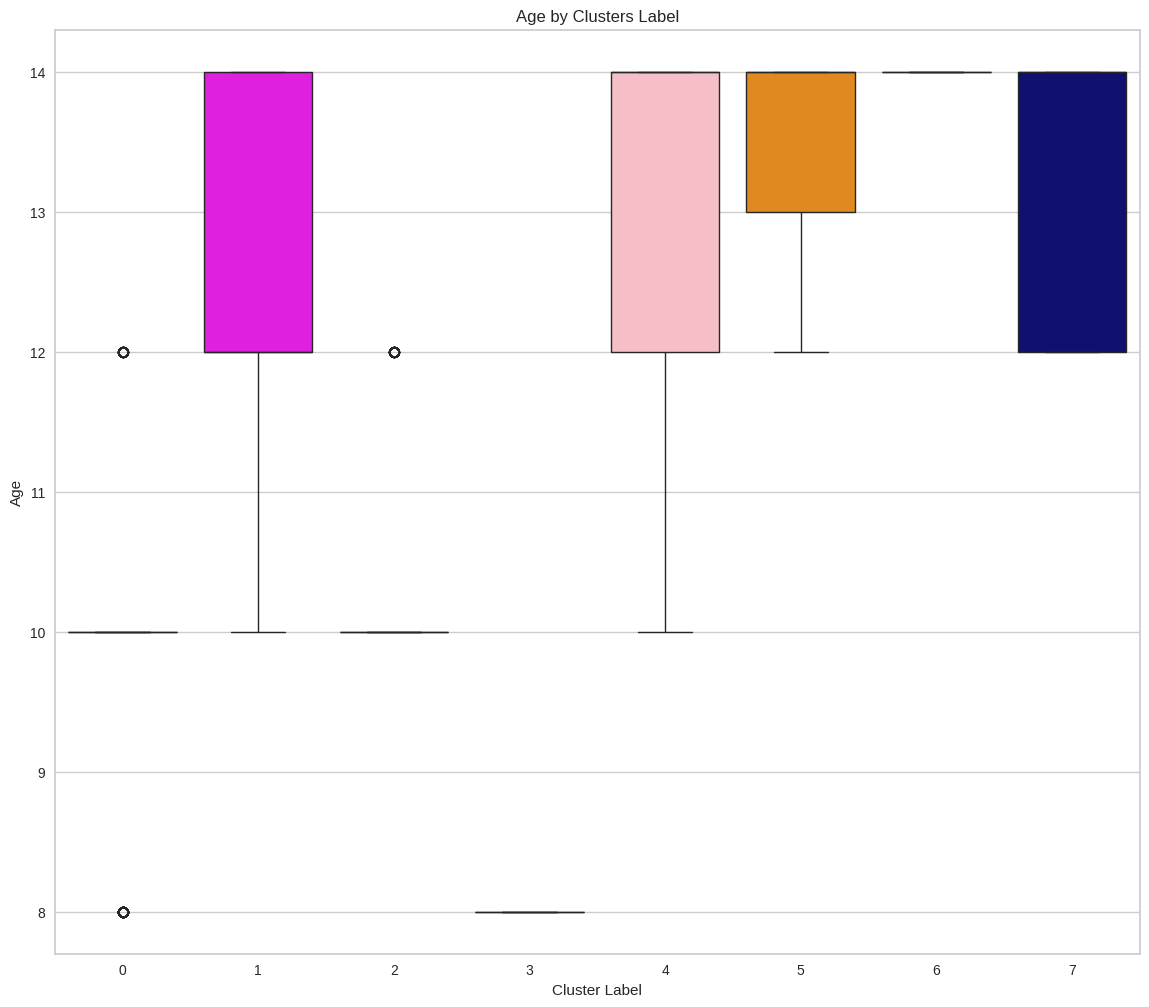

In [32]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='age', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Age by Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Age')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_72975/2029518596.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='max_players', legend=False, hue='label', palette=palette)


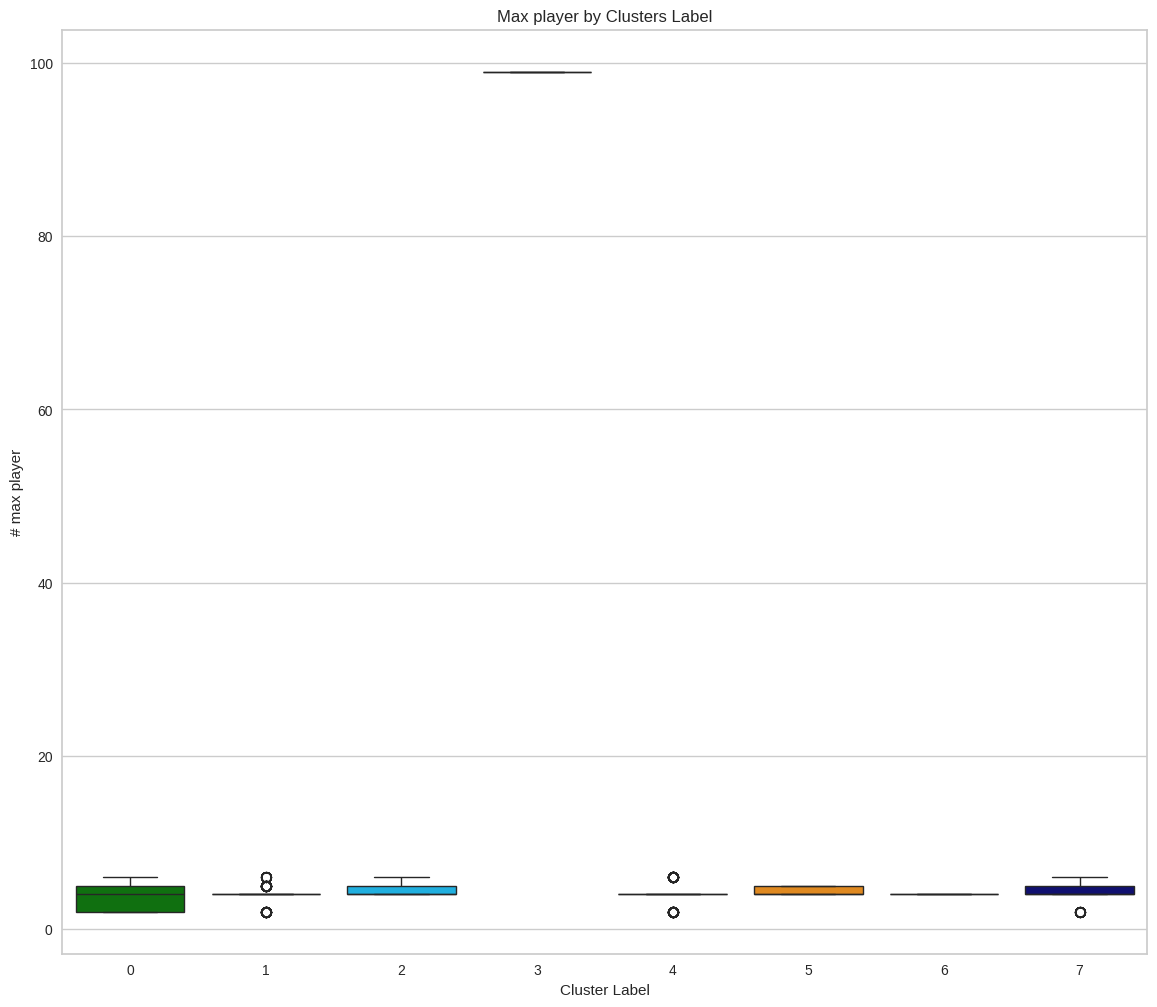

In [33]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='max_players', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Max player by Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('# max player')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_72975/2275380775.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='minplaytime', legend=False, hue='label', palette=palette)


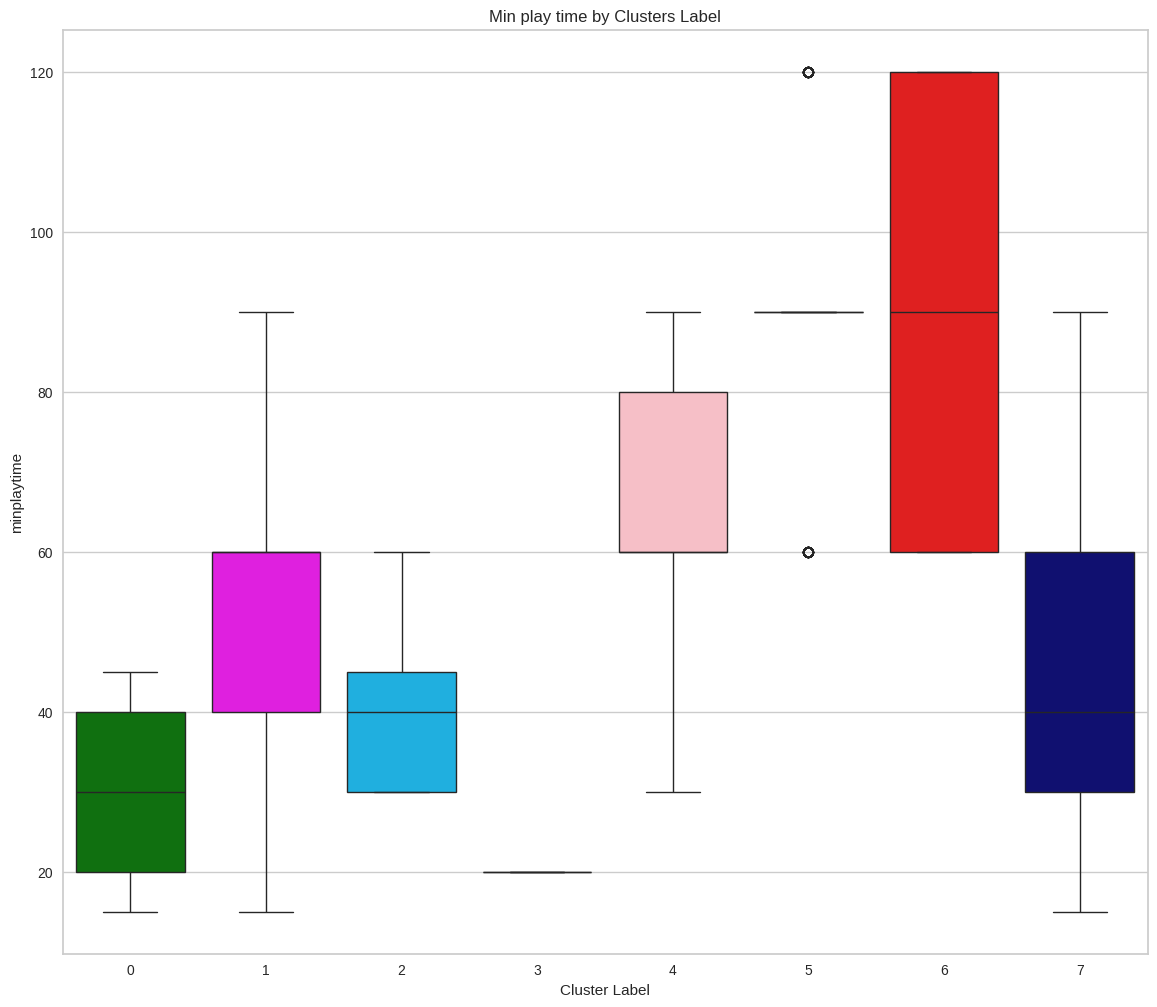

In [34]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='minplaytime', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Min play time by Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('minplaytime')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_72975/2363328473.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='maxplaytime', legend=False, hue='label', palette=palette)


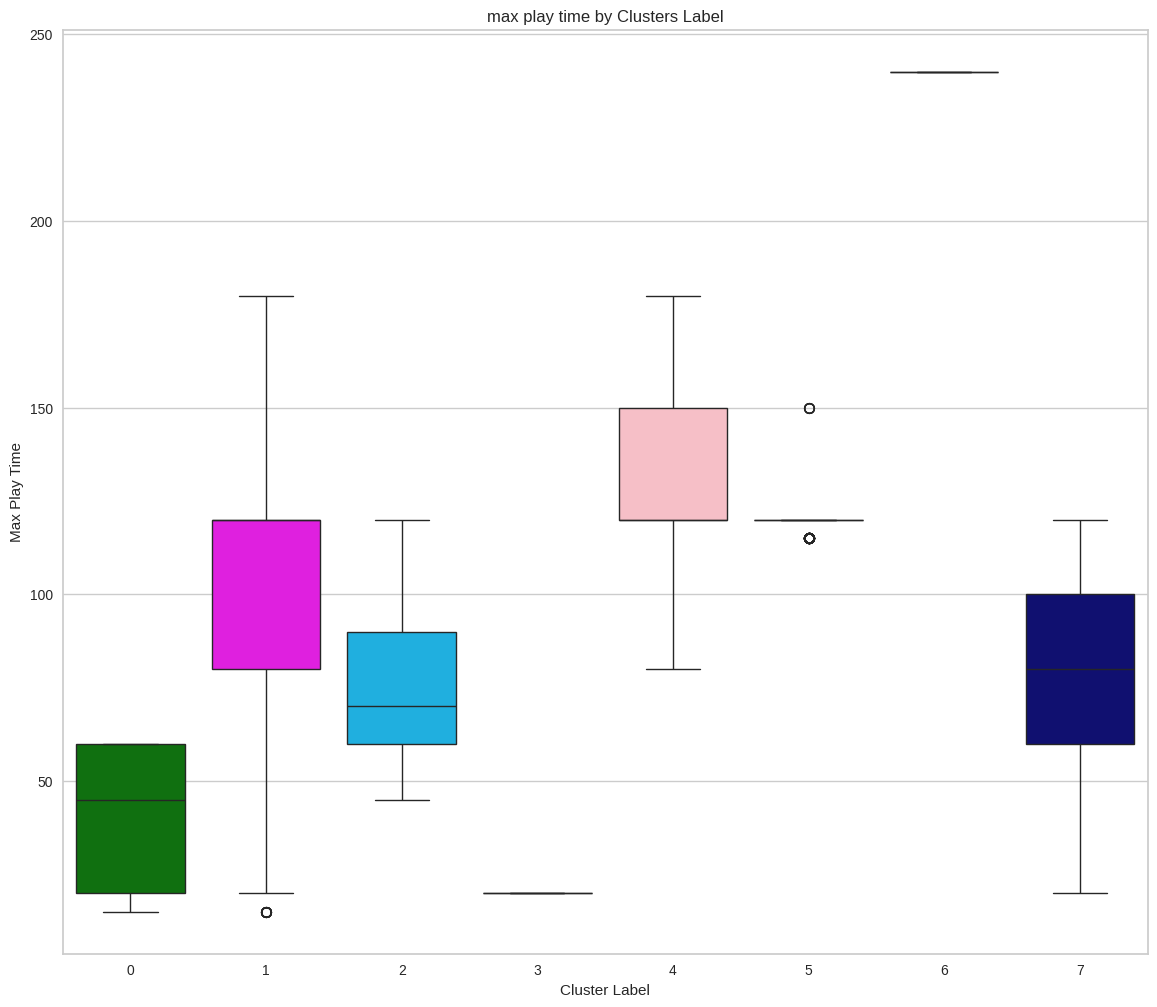

In [35]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='maxplaytime', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'max play time by Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Max Play Time')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_72975/2778007080.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='Sentiment', legend=False, hue='label', palette=palette)


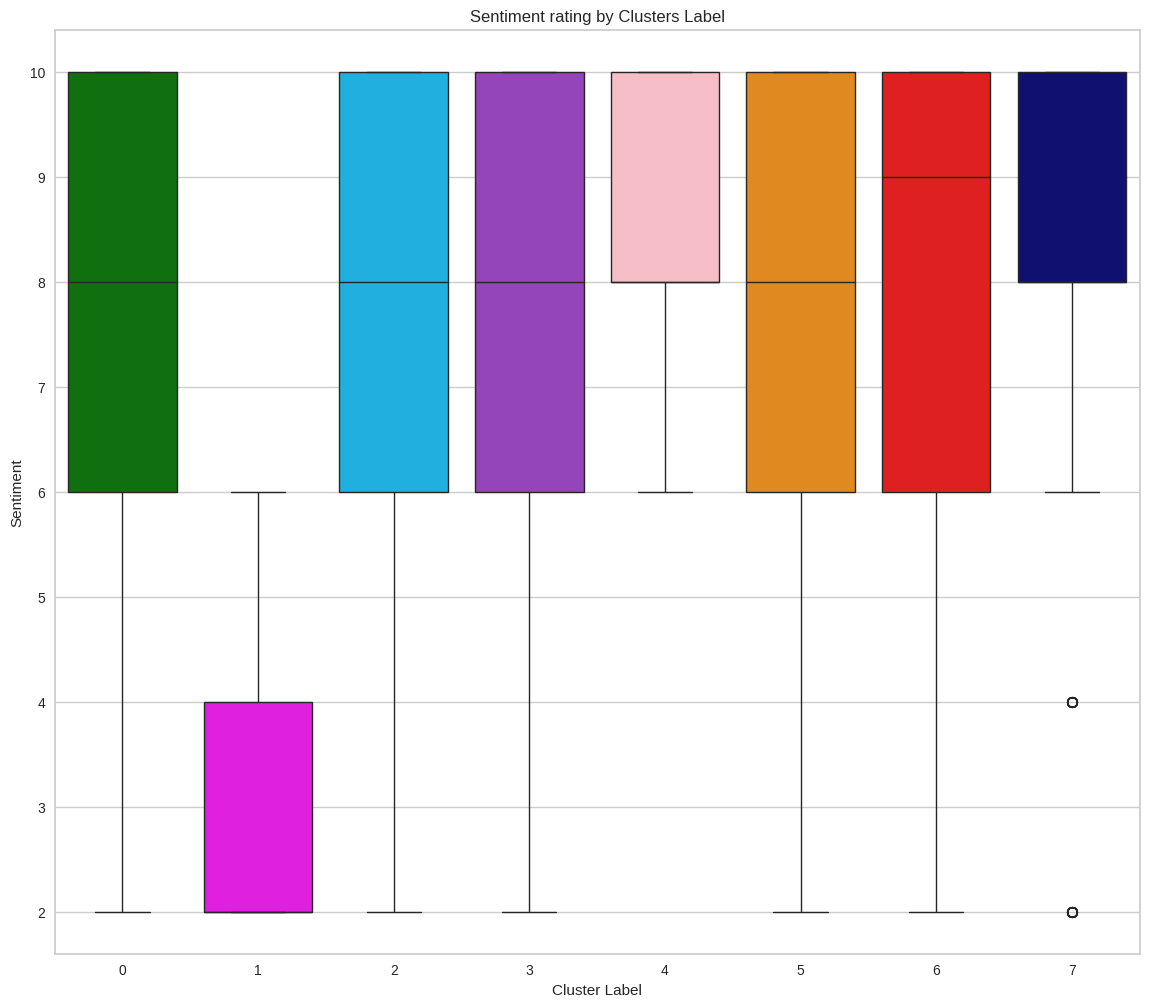

In [36]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='Sentiment', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Sentiment rating by Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Sentiment')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_72975/572837190.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='ratings_avg', legend=False, hue='label', palette=palette)


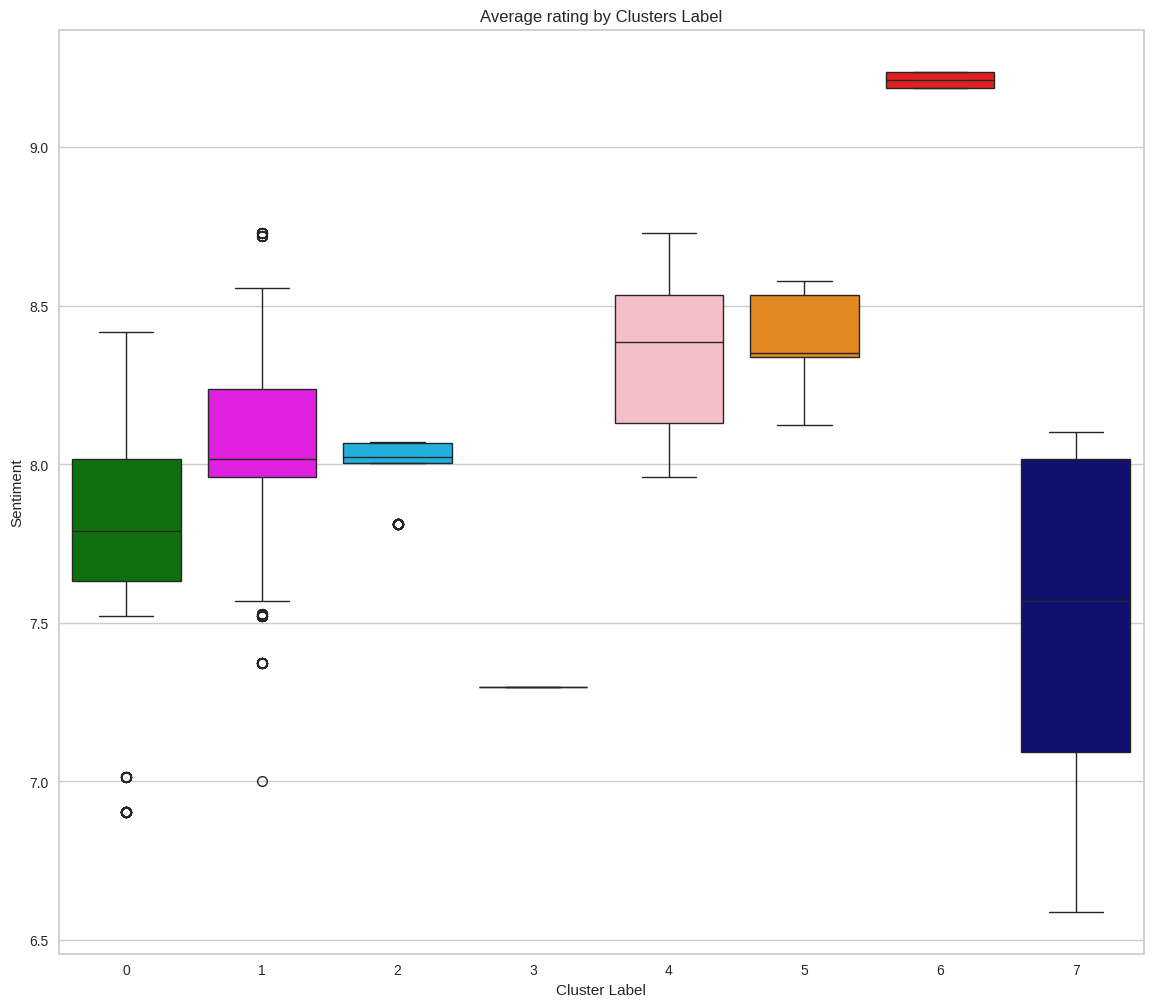

In [45]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='ratings_avg', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Average rating by Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Sentiment')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


---

<center>
    
## Results

</center>

---

| Cluster | Interpretation for Games|
| :---------: |----------------|
| 0       | - Pre-teens</br>- Short play time</br>- Low to high ratings</br>- Average popularity               |
| 1       | - Teens & Adults </br>- Moderate play time</br>- Moderate ratings</br>- Low popularity                |
| 2       | - Pre-teens</br>- Moderate play time</br>- Moderate ratings</br>- High popularity                |
| 3       | - Kids</br>- Very short play time</br>- Low ratings</br>- Unpopular                |
| 4       | - Teens & Adults</br>- Short to long play time</br>- High ratings</br>- Average popularity                |
| 5       | - Teens & Adults</br>- Long play time</br>- High ratings</br>- Highest popularity                 |
| 6       | - Mid-Teens & Adults</br>- Longest play time</br>- Highest ratings</br>- Low popularity                |
| 7       | - Teens & Adults</br>- Moderate play time</br>- Low to high ratings</br>- Lowest popularity                |


**2D PCA plot with clusters**

In [38]:
pca = PCA(n_components=2)

df[['PC1', 'PC2']] = pca.fit_transform(X)

In [39]:
df

username  rating  \
0     causticforever     NaN   
1          Corwin007     NaN   
2        IronTarkles     NaN   
3             MarkyX     NaN   
4         mikamikomi     1.0   
...              ...     ...   
4193     chicagometh     4.8   
4194    Chris Coyote     NaN   
4195       Chris_P85     9.0   
4196      Chutch1035     5.0   
4197         Citadel     NaN   

                                                comment    gamename  \
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
1                            UPCOMING\n\nArk Nova lite?   Sanctuary   
2                       New game from ark nova designer   Sanctuary   
3     I'm very interested in this one. I like the co...   Sanctuary   
4          3 artist yet still use stock photos? oh yeah   Sanctuary   
...                                                 ...         ...   
4193  4...'Not so good, but could play again' by BGG...  Civolution   
4194                                      Birthday 2025  Civolution   
4195                     Played a half Game at Spiel 24  Civolution   
4196  I love Feld games and I love Civ games. When I...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   

                                              mechanics  min_players  \
0     Action Queue,Hand Management,Hexagon Grid,Open...            1   
1     Action Queue,Hand Management,Hexagon Grid,Open...            1   
2     Action Queue,Hand Management,Hexagon Grid,Open...            1   
3     Action Queue,Hand Management,Hexagon Grid,Open...            1   
4     Action Queue,Hand Management,Hexagon Grid,Open...            1   
...                                                 ...          ...   
4193  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4194  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4195  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4196  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   

      max_players  minplaytime  maxplaytime  age  ...  count_wanting  \
0               5           40          100   12  ...             55   
1               5           40          100   12  ...             55   
2               5           40          100   12  ...             55   
3               5           40          100   12  ...             55   
4               5           40          100   12  ...             55   
...           ...          ...          ...  ...  ...            ...   
4193            4           90          180   14  ...            580   
4194            4           90          180   14  ...            580   
4195            4           90          180   14  ...            580   
4196            4           90          180   14  ...            580   
4197            4           90          180   14  ...            580   

      count_wishing                                        description  \
0               569  In Sanctuary, you will plan and design a moder...   
1               569  In Sanctuary, you will plan and design a moder...   
2               569  In Sanctuary, you will plan and design a moder...   
3               569  In Sanctuary, you will plan and design a moder...   
4               569  In Sanctuary, you will plan and design a moder...   
...             ...                                                ...   
4193           4089  Hello, student beings! The cosmic faculty of t...   
4194           4089  Hello, student beings! The cosmic faculty of t...   
4195           4089  Hello, student beings! The cosmic faculty of t...   
4196           4089  Hello, student beings! The cosmic faculty of t...   
4197           4089  Hello, student beings! The cosmic faculty of t...   

                                             categories lang Sentiment  label  \
0              Animals,Environmental,Territory Building   en         8    

/tmp/ipykernel_72975/3558617702.py:5: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(data=df, x='PC1', y='PC2', hue='label_str', palette=palette)


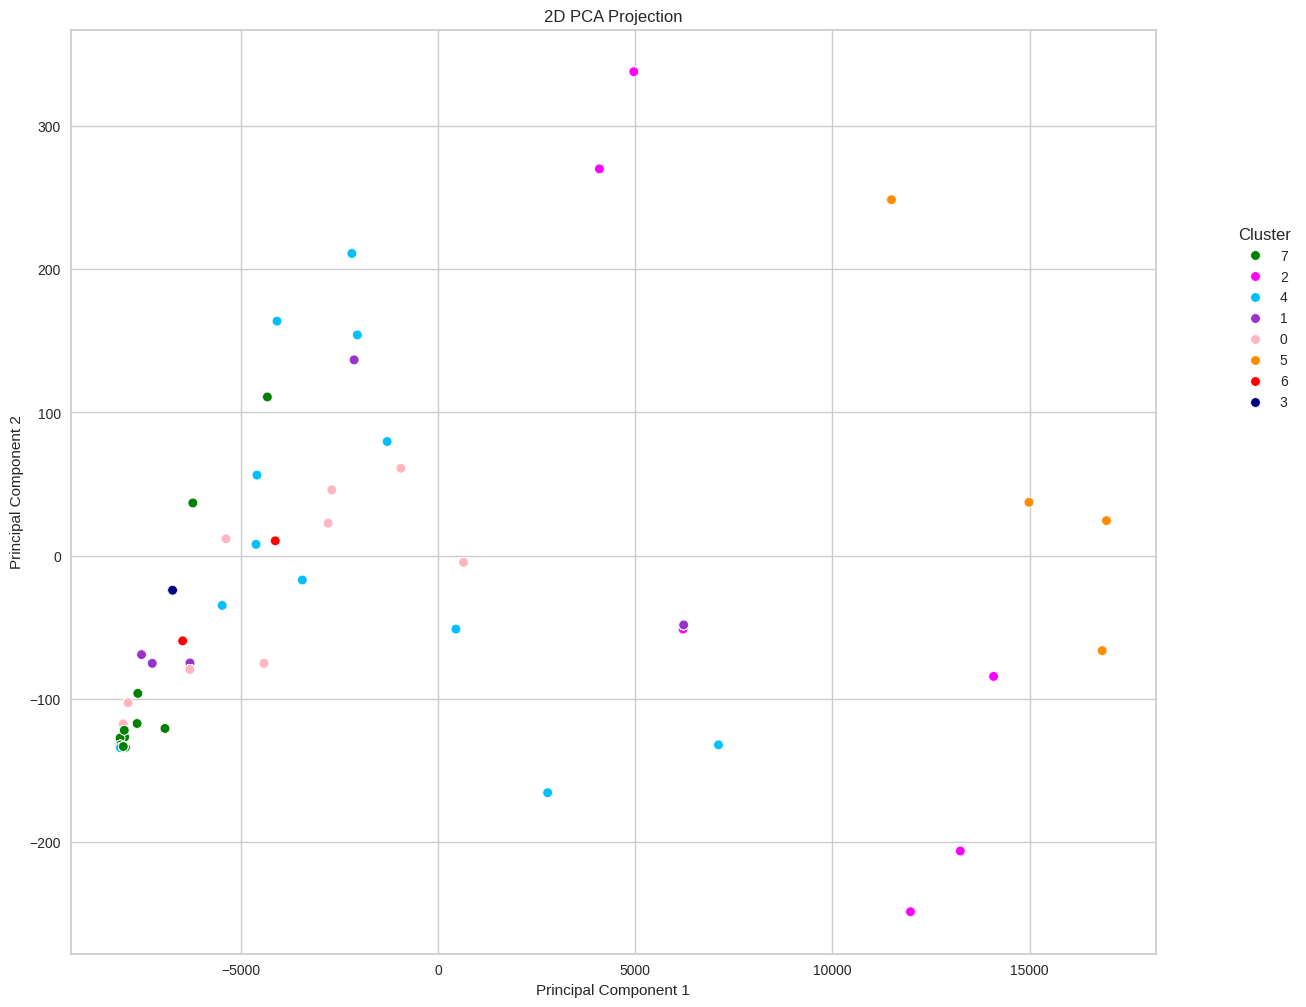

In [40]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

# Create scatter plot
ax = sns.scatterplot(data=df, x='PC1', y='PC2', hue='label_str', palette=palette)

# Add title
plt.title('2D PCA Projection')

# Add axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjust legend position
plt.legend(title="Cluster", loc='upper center', bbox_to_anchor=(1.1, 0.8), ncol=1)

# Save plot
plt.savefig('../graph/PCA_2d.png')

# Show plot
plt.show()

**3D PCA plot with clusters**

In [41]:
pca = PCA(n_components=3)

df[['PC1', 'PC2', 'PC3']] = pca.fit_transform(X)

In [42]:
df

username  rating  \
0     causticforever     NaN   
1          Corwin007     NaN   
2        IronTarkles     NaN   
3             MarkyX     NaN   
4         mikamikomi     1.0   
...              ...     ...   
4193     chicagometh     4.8   
4194    Chris Coyote     NaN   
4195       Chris_P85     9.0   
4196      Chutch1035     5.0   
4197         Citadel     NaN   

                                                comment    gamename  \
0     Played prototype- will be an enjoyable way to ...   Sanctuary   
1                            UPCOMING\n\nArk Nova lite?   Sanctuary   
2                       New game from ark nova designer   Sanctuary   
3     I'm very interested in this one. I like the co...   Sanctuary   
4          3 artist yet still use stock photos? oh yeah   Sanctuary   
...                                                 ...         ...   
4193  4...'Not so good, but could play again' by BGG...  Civolution   
4194                                      Birthday 2025  Civolution   
4195                     Played a half Game at Spiel 24  Civolution   
4196  I love Feld games and I love Civ games. When I...  Civolution   
4197  Nice Civ-lite minus the combat element. Tons o...  Civolution   

                                              mechanics  min_players  \
0     Action Queue,Hand Management,Hexagon Grid,Open...            1   
1     Action Queue,Hand Management,Hexagon Grid,Open...            1   
2     Action Queue,Hand Management,Hexagon Grid,Open...            1   
3     Action Queue,Hand Management,Hexagon Grid,Open...            1   
4     Action Queue,Hand Management,Hexagon Grid,Open...            1   
...                                                 ...          ...   
4193  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4194  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4195  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4196  Area Movement,Dice Rolling,Events,Hand Managem...            1   
4197  Area Movement,Dice Rolling,Events,Hand Managem...            1   

      max_players  minplaytime  maxplaytime  age  ...  count_wishing  \
0               5           40          100   12  ...            569   
1               5           40          100   12  ...            569   
2               5           40          100   12  ...            569   
3               5           40          100   12  ...            569   
4               5           40          100   12  ...            569   
...           ...          ...          ...  ...  ...            ...   
4193            4           90          180   14  ...           4089   
4194            4           90          180   14  ...           4089   
4195            4           90          180   14  ...           4089   
4196            4           90          180   14  ...           4089   
4197            4           90          180   14  ...           4089   

                                            description  \
0     In Sanctuary, you will plan and design a moder...   
1     In Sanctuary, you will plan and design a moder...   
2     In Sanctuary, you will plan and design a moder...   
3     In Sanctuary, you will plan and design a moder...   
4     In Sanctuary, you will plan and design a moder...   
...                                                 ...   
4193  Hello, student beings! The cosmic faculty of t...   
4194  Hello, student beings! The cosmic faculty of t...   
4195  Hello, student beings! The cosmic faculty of t...   
4196  Hello, student beings! The cosmic faculty of t...   
4197  Hello, student beings! The cosmic faculty of t...   

                                             categories lang Sentiment label  \
0              Animals,Environmental,Territory Building   en         8     7   
1              Animals,Environmental,Territory Building   en         6     7   
2              Animals,Environmental,Territory Building   en        10     7   
3              

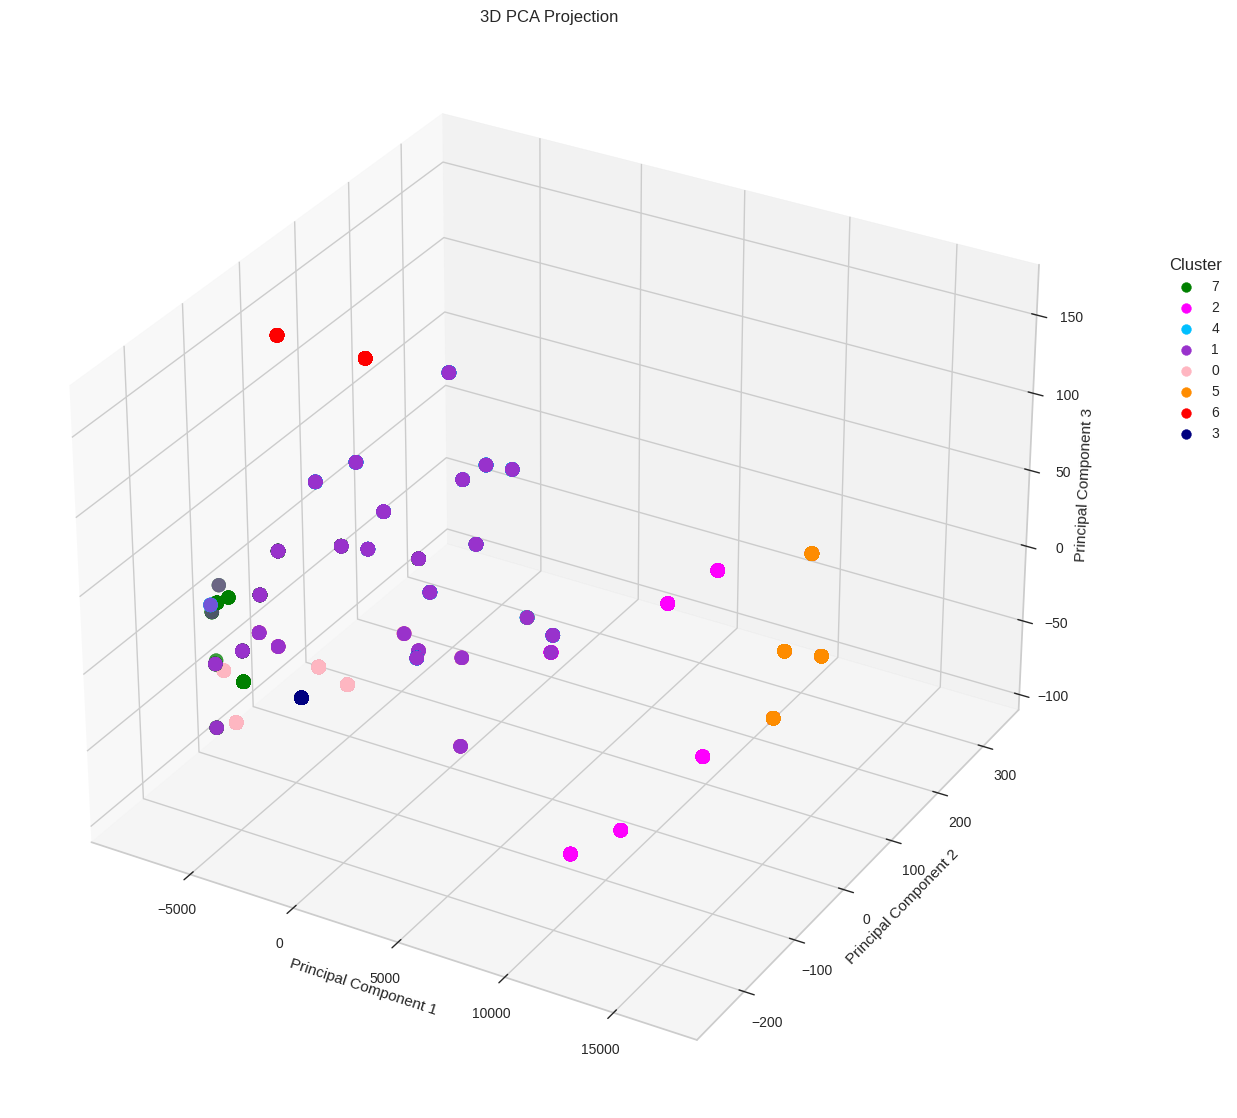

In [43]:
# Create figure and adjust size
fig = plt.figure(figsize=(16, 14))


ax = fig.add_subplot(111, projection='3d')

# Map colors based on hue
hue = df['label'].unique()
color_map = dict(zip(hue, palette[0:len(hue)]))
df['Color'] = df['label'].map(color_map)

# Create scatter plot
ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Color'], s=100, alpha=0.5)

# Add title
plt.title('3D PCA Projection')

# Add axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add cluster color in legend
for hue, color in color_map.items():
    ax.scatter([], [], [], color=color, label=hue, s=50)

# Adjust legend position
ax.legend(title="Cluster",loc='upper center', bbox_to_anchor=(1.1, 0.8), ncol=1)

# Save plot
plt.savefig('../graph/PCA_3d.png')

# Show plot
plt.show()

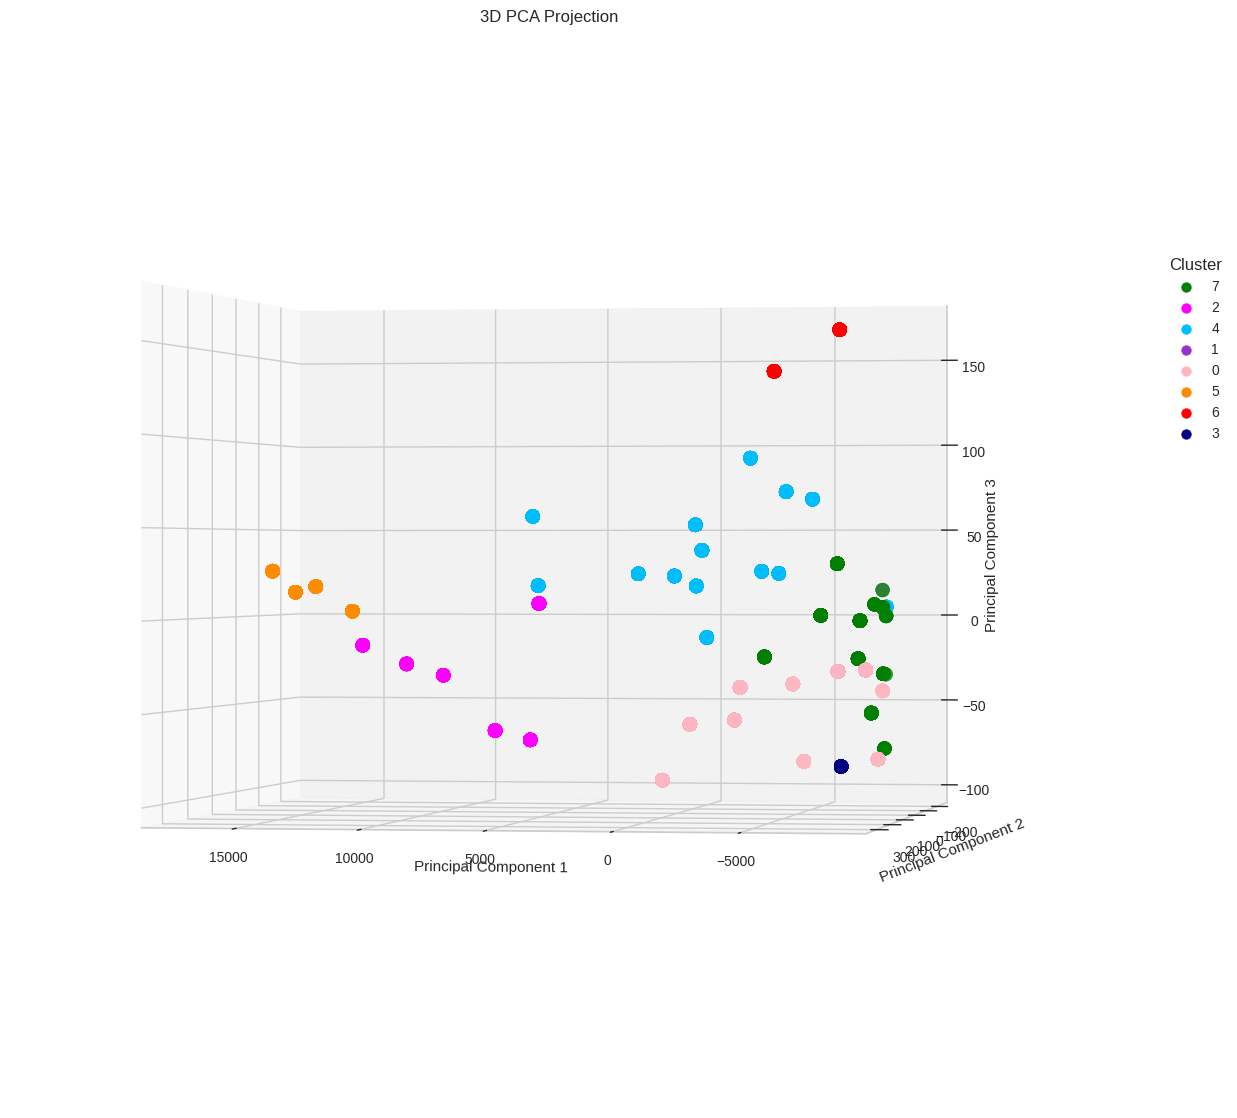

In [44]:
# Create figure and adjust size
fig = plt.figure(figsize=(16, 14))


ax = fig.add_subplot(111, projection='3d')

# Map colors based on hue
hue = df['label'].unique()
color_map = dict(zip(hue, palette[0:len(hue)]))
df['Color'] = df['label'].map(color_map)

# Create scatter plot
ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Color'], s=100)

# Add title
plt.title('3D PCA Projection')

# Add axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.view_init(elev=0,azim=100)  

# Add cluster color in legend
for hue, color in color_map.items():
    ax.scatter([], [], [], color=color, label=hue, s=50)

# Adjust legend position
ax.legend(title="Cluster",loc='upper center', bbox_to_anchor=(1.1, 0.8), ncol=1)

# Save plot
plt.savefig('../graph/PCA_3d_diffview.png')

# Show plot
plt.show()